# Ford GoBike Data Analysis by Fletcher Sarip

## Introduction

The data contains bike usage of Ford GoBike for the month February 2019.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

%matplotlib inline

### Import Data and Column Data Type Conversions
Below the data is imported with data type conversion for each column. Note that it is accepted for user birth year to be floating point number because there is NaN in the column.

In [2]:
df = pd.read_csv('data/201902-fordgobike-tripdata.csv',
                 parse_dates=['start_time', 'end_time'],
                 dtype={'start_station_id': 'str',
                        'end_station_id': 'str',
                        'bike_id': 'str',
                        'user_type': 'category',
                        'member_birth_year': 'Int16',
                        'member_gender': 'category'})

df.rename(columns={'member_birth_year': 'user_birth_year', 'member_gender': 'user_gender'}, inplace=True)

assert df.iloc[0].start_time == pd.to_datetime('2019-02-28 17:32:10.1450') # consistency check

For the column bike_share_for_all_trip, it is ensured below that the values only consist of 'Yes' or 'No', so they'll be converted to boolean, where 'Yes' will be true and 'No' will be false.

In [3]:
print(f'Unique values of bike_share_for_all_trip column: {df.bike_share_for_all_trip.unique()}')

Unique values of bike_share_for_all_trip column: ['No' 'Yes']


In [4]:
assert df.bike_share_for_all_trip.unique().size == 2 # for safety before conversion
df.bike_share_for_all_trip = df.bike_share_for_all_trip.apply(lambda x: x == 'Yes')
assert df.bike_share_for_all_trip.sum() == 17359 # for consistency checking

Data type conversion is now done. Below the dataframe previews are printed.

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,user_birth_year,user_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,<NA>,NaN,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [7]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### Data Quality Assessment
#### Null Start and End Station
##### Assessment
Checking rows that have null values for start and end station ID.

In [8]:
df.loc[df.start_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,user_birth_year,user_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991,Female,False
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980,Male,False
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988,Male,False
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984,Male,True
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984,Male,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.544,2019-02-02 12:27:12.267,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984,Male,False
179730,309,2019-02-01 12:59:45.969,2019-02-01 13:04:55.426,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987,Female,False
179970,659,2019-02-01 12:17:37.675,2019-02-01 12:28:37.014,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999,Female,False
180106,2013,2019-02-01 11:33:55.147,2019-02-01 12:07:28.940,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990,Female,False


Below assertions check that null station ID will always be accompanied by null station name.

In [9]:
assert (df.start_station_id.isna() & ~df.start_station_name.isna()).sum() == 0
assert (~df.start_station_id.isna() & df.start_station_name.isna()).sum() == 0
assert (df.end_station_id.isna() & ~df.end_station_name.isna()).sum() == 0
assert (~df.end_station_id.isna() & df.end_station_name.isna()).sum() == 0

Conclusion: It is okay to have null station name and ID, because possibly due to not yet recognized place. The latitude and longitude information of the station can still be used for analysis.

#### Null User Birth Year and Gender

##### Assessment
Below assertions check that null user birth year is always accompanied by null user gender.

In [10]:
assert (df.user_birth_year.isna() & ~df.user_gender.isna()).sum() == 0
assert (~df.user_birth_year.isna() & df.user_gender.isna()).sum() == 0

Below code shows that both customers and subscribers may have null user birth year and gender.

In [11]:
print(f'User types having null birth year: {df.loc[df.user_birth_year.isna()].user_type.unique().to_list()}')
print(f'User types having null gender: {df.loc[df.user_gender.isna()].user_type.unique().to_list()}')

User types having null birth year: ['Customer', 'Subscriber']
User types having null gender: ['Customer', 'Subscriber']


*Extra information*: Below code shows that amongst the rows with null birth year and gender, 60.8% of them are subscribers, while 39.2% are customers.

In [12]:
df.loc[df.user_birth_year.isna()].groupby('user_type').bike_id.count() / df.user_birth_year.isna().sum()

user_type
Customer      0.391652
Subscriber    0.608348
Name: bike_id, dtype: float64

It is okay to have null user birth year and gender, which is considered as part of data privacy protection. However, to aid analysis, I'll replace the null values in user gender with "Not Given".

##### Cleaning
Replace the null values in user age with "Not Given".

In [13]:
not_given_cat = 'Not Given'
if not_given_cat not in df.user_gender.cat.categories:
    df.user_gender = df.user_gender.cat.add_categories(not_given_cat)
df.user_gender = df.user_gender.fillna(not_given_cat)

##### Test

In [14]:
assert df.user_gender.isna().sum() == 0

#### Too-Early User Birth Year

##### Assessment
From the print below, you can see that the minimum of user birth year is 1878, which shows that the user is 141 years old (with respect to year 2019). This is practically inaccurate, as person that old is highly unlikely to be able to ride a bike.

In [15]:
df.loc[df.user_birth_year == df.user_birth_year.min()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,user_birth_year,user_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,False


In [16]:
df.user_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: user_birth_year, dtype: float64

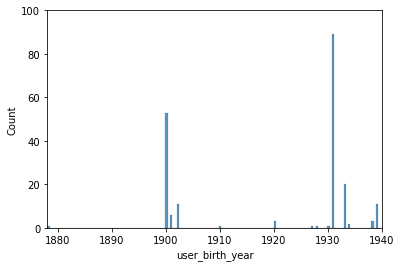

In [17]:
sb.histplot(df.user_birth_year)
plt.xlim(1878, 1940)
plt.ylim(0, 100);

From the histogram above, it can be seen that there are weirdly high number of users with birth year on 1900. Even though it is possible for a human that old to still be able to cycle, there should only be a few of people that are able to do so. Even the oldest cyclist that we have right now so far, i.e. Robert Marchand, is born on 1911. The fact that it's only him that receives the spotlight in the world means that it is highly unlikely that there are other people near his age that still cycles.

Looking at the histogram above, there seems to be a spike at around 1930. This is still logically possible since people born 1930 will be 89 years old by the time this data is collected (i.e. at 2019), and it is still quite possible for people aged 89 to still be able to cycle a bike. There are also some users with birth year a bit earlier than 1930. Thus, from this, I'd set the threshold for the user birth year to be around 1925, so as to give the benefit of the doubt to the users that are born a bit earlier than 1930. For users with birth year earlier than 1925, I will consider them as inaccurate values and will replace their birth year as null. I will not set them to an assumed value so that it does not interfere with analysis result.

##### Cleaning
Replace user_birth_year that are earlier than 1925 to be NaN.

In [18]:
idxs = df.user_birth_year < 1925
old_number_of_nans = df.user_birth_year.isna().sum()
df.user_birth_year.loc[idxs] = np.NaN

##### Test

In [19]:
assert df.user_birth_year.isna().sum() == old_number_of_nans + idxs.sum()
assert (df.user_birth_year < 1925).sum() == 0

Now we can see in below histogram that there are no more users with birth year earlier than 1925.

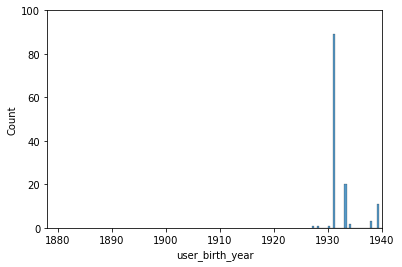

In [20]:
np.sort(df.user_birth_year.dropna().values)
sb.histplot(df.user_birth_year)
plt.xlim(1878, 1940)
plt.ylim(0, 100);

#### Duration Accuracy Assessment
Comparing the duration with the difference between start and end time, and showing the statistics, shows that the duration values are accurate. This is because as can be seen below, the maximum difference between the duration and the actual difference between start and end time is only 999 milliseconds.

In [21]:
((df.end_time - df.start_time) - pd.to_timedelta(df.duration_sec, unit='sec')).describe()

count                       183412
mean     0 days 00:00:00.499112729
std      0 days 00:00:00.288287556
min                0 days 00:00:00
25%         0 days 00:00:00.249000
50%         0 days 00:00:00.500000
75%         0 days 00:00:00.748000
max         0 days 00:00:00.999000
dtype: object

Conclusion: it is concluded that the duration and the start and end times approximately agree with each other, and hence the duration data is accurate and consistent.

#### Data Quality Assessment Conclusion

All columns are now considered as acceptable and in good quality. The data is also considered as tidy. Below the dataframes preview are presented.

In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,user_birth_year,user_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,<NA>,Not Given,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [24]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175072.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.842333
std,1794.389780,0.099581,0.117097,0.099490,0.116673,9.968551
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1927.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### Feature Engineering
Some new features are engineered to aid analysis later on. Actually these columns were generated during data analysis, but they are all compiled in this section for convenience.

#### Duration in Timedelta Type and in Logarithm-Seconds Scale
New columns are created for duration with Timedelta type and also for duration in log values of the duration in seconds.

In [25]:
df['duration'] = pd.to_timedelta(df.duration_sec, unit='sec')
df['duration_sec_log'] = np.log10(df.duration_sec)

#### Age
To help analysis, age column is created based on the user birth year and the year in which this data is collected, which is 2019.

In [26]:
df['user_age'] = 2019 - df.user_birth_year

#### Age Category
To help analysis, I will categorize the user's age, where the categorization thresholds are based on the distribution of the age.  
Below is the distribution of the age:

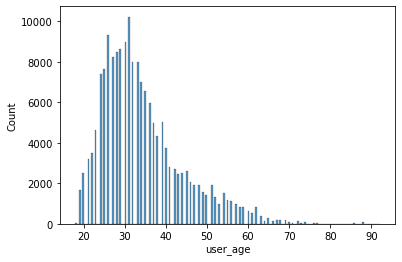

In [27]:
sb.histplot(df.user_age);

From the age distribution above, I decided to categorize the user age to the following categories: under 25, 25 to 30, 30s, 40s, 50s, 60s, 70s, and above (and including) 80.  
The "s" means the age in that decade, e.g. 30s means the age from 30 up to 39.  
This categorization decision is to balance both to include as much population in each category as possible, while at the same time preventing loss of information details.

In [28]:
user_age_bins = [0, 25, 30, 40, 50, 60, 70, 80, 100]
user_age_labels = ['< 25', '25-30', '30s', '40s', '50s', '60s', '70s','>= 80']
df['user_age_category'] = pd.cut(df.user_age, bins=user_age_bins, ordered=True, labels=user_age_labels)

#### Station Region
Below plot shows the map of the start stations based on their latitudes and longitudes (end stations are more or less similar, so will not be shown here).

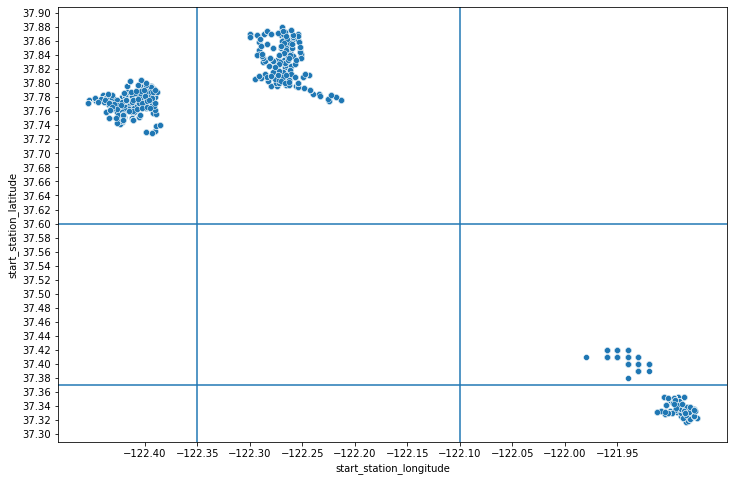

In [29]:
plt.figure(figsize=(12,8))
sb.scatterplot(data=df, x='start_station_longitude', y='start_station_latitude')
plt.yticks(np.arange(37.3, 37.9, 0.02));
plt.xticks(np.arange(-122.4, -121.9, 0.05), rotation=0);
plt.axhline(37.37)
plt.axhline(37.6)
plt.axvline(-122.35)
plt.axvline(-122.1);

From the map above, it can be seen that the stations can be clustered into 4 regions. First, we'll cluster the latitudes into 3 regions: North, Middle, and South, which are separated at latitudes of 37.37 and 37.6. Then we'll cluster the longitudes into 3 regions: West, Middle, and East, which are separated at longitudes of -122.35 and -122.1. We'll do this for both the start and end stations.

In [30]:
latitude_bins = [37.3, 37.37, 37.6, 37.9]
df['start_station_latitude_category'] = pd.cut(df.start_station_latitude, bins=latitude_bins, include_lowest=True,
                                              labels=['South','Middle', 'North'])
df['end_station_latitude_category'] = pd.cut(df.end_station_latitude, bins=latitude_bins, include_lowest=True,
                                              labels=['South','Middle', 'North'])

In [31]:
longitude_bins = [-122.5, -122.35, -122.1, -121.8]
df['start_station_longitude_category'] = pd.cut(df.start_station_longitude, bins=longitude_bins, include_lowest=True,
                                              labels=['West', 'Middle', 'East'])
df['end_station_longitude_category'] = pd.cut(df.end_station_longitude, bins=longitude_bins, include_lowest=True,
                                              labels=['West', 'Middle', 'East'])

We'll then combine the station latitude and longitude categories created above to be the station region column for both start and end stations.

In [32]:
df['start_station_region'] = (df.start_station_latitude_category.astype(str) + df.start_station_longitude_category.astype(str)).astype('category')
df['end_station_region'] = (df.end_station_latitude_category.astype(str) + df.end_station_longitude_category.astype(str)).astype('category')

# reorder the categories to be more intuitive
df.start_station_region.cat.reorder_categories(['NorthWest', 'NorthMiddle', 'MiddleEast', 'SouthEast'], inplace=True)
df.end_station_region.cat.reorder_categories(['NorthWest', 'NorthMiddle', 'MiddleEast', 'SouthEast'], inplace=True)

### Save Cleaned Data

In [33]:
df.to_csv('data/201902-fordgobike-tripdata-cleaned.csv', index=False)

### Discussion
#### What is the structure of your dataset?
There are 183412 bike usage records in the dataset with 14 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, user_birth_year, user_gender, bike_share_for_all_trip).

I renamed the member_birth_year and member_gender to be user_birth_year and user_birth_type for consistency. This is also because not all users are "members", because some of them are just one-off customer. So using "user" for the name is more appropriate.

The columns are mostly numeric with some datetime columns for start and end time and some nominal categorical columns like user_type and user_gender.

There are some null values for the station IDs and names, user birth year, and user gender, but those null values are deemed reasonable and will not be removed.

Some new features are engineered to aid analysis later on, which are:
- duration in timedelta type and in logarithm of seconds
- user age and age category
- station latitude category, longitude category, and region name (which is combination of latitude and longitude category) for both start and end station

#### What is/are the main feature(s) of interest in your dataset?
Main features of interest in the dataset is the statistics of bike demand based on user demography, booking location, and booking time.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Bike demand can be measured by:
- duration
- count of rows

This bike demand metric will be measured against the following features:
- user demography, which is represented by:
  - user age
  - user gender
  - user type
- booking location, which is represented by start station
- booking time, which is represented by start time

## Univariate Exploration

In this univariate exploration, first we'll explore the main feature of interest, which is the duration. Then afterward, we'll move on to the explanatory variables in which the duration will be measured against, i.e. the user demography columns, booking location, and booking time.

### Duration
First we'll look at the main feature of interest: duration. Let's see its histogram.

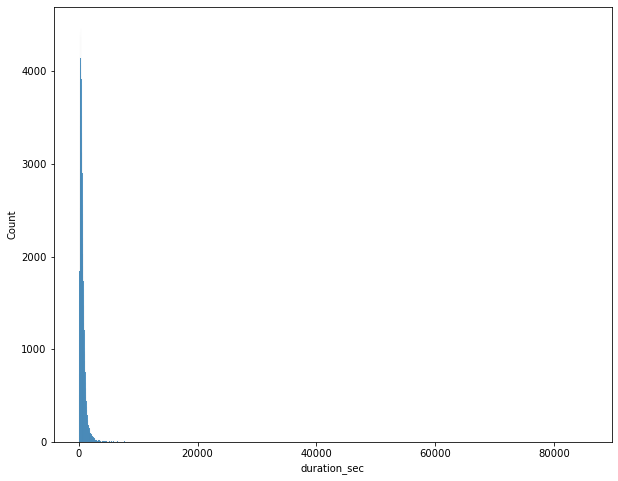

In [34]:
plt.figure(figsize=(10,8))
sb.histplot(df.duration_sec);

As you can see above, it seems the distribution is highly right-skewed. Also it seems that there are very low counts for the longer duration, which is not visible in the graph. Below we'll split the histogram into multiple sections.

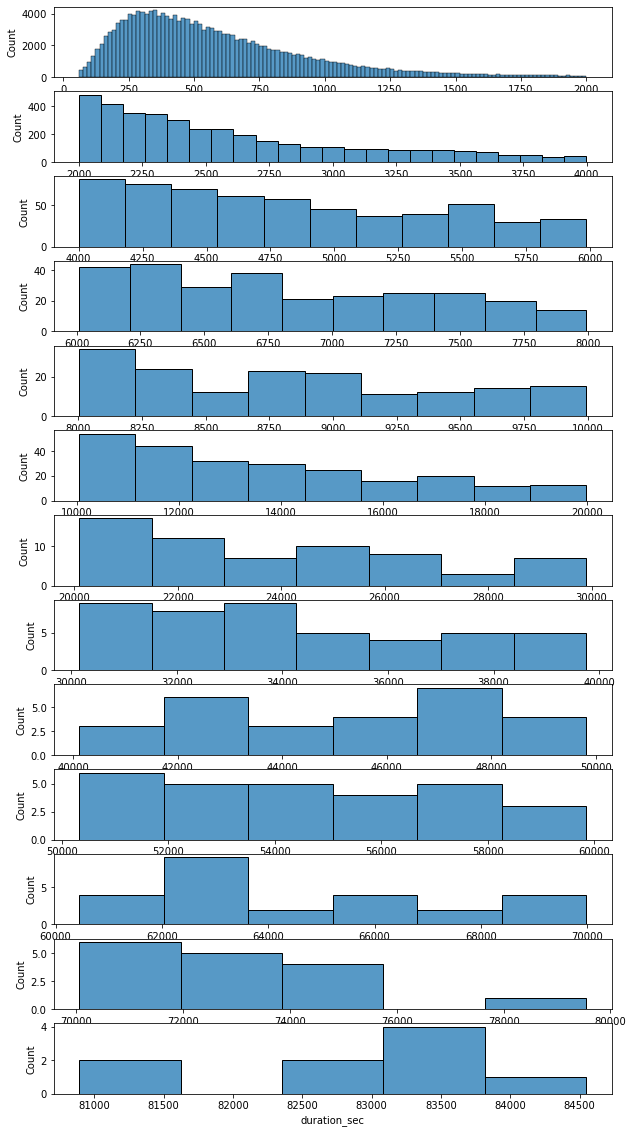

In [35]:
start_duration = -0.001
end_durations = [2000, 4000, 6000, 8000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 85000]
plt.figure(figsize=(10,20))
plt.tight_layout()
for i, end_duration in enumerate(end_durations, start=1):
    plt.subplot(len(end_durations), 1, i)
    idxs = (df.duration_sec > start_duration) & (df.duration_sec <= end_duration)
    sb.histplot(df.duration_sec[idxs])
    start_duration = end_duration

The above histogram now shows the count at longer duration in clearer manner. From the histogram, we can confirm that indeed the duration distribution is highly right-skewed. Also, the distribution is smooth, i.e. no big gaps with zero counts in the distribution, showing that there are no outliers. The maximum value of distribution, i.e. ~84500 seconds which is around 24 hours, also still makes sense.

Since it is right-skewed, I'll transform the duration to be in log scale below, in the hopes that I can get rid of the right-skewedness.

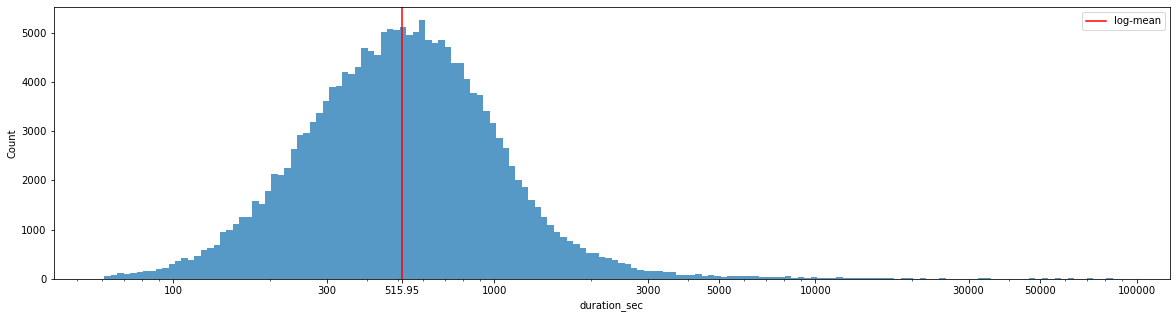

In [36]:
bins_log_size = 0.02
powers = np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max()) + bins_log_size, bins_log_size)
bins = 10 ** powers

plt.figure(figsize=(20,5))
sb.histplot(df.duration_sec, bins=bins)
plt.xscale('log')
plt.xticks([100, 300, 515.95, 1000, 3000, 5000, 10000, 30000, 50000, 100000], [100, 300, 515.95, 1000, 3000, 5000, 10000, 30000, 50000, 100000]);
plt.axvline(515.95, color='red', label='log-mean')
plt.legend();

In [37]:
f'Log-mean duration: {10**df.duration_sec_log.mean():.2f} seconds'

'Log-mean duration: 515.95 seconds'

The distribution above shows that the duration is approximately normally distributed on log scale, with slight left-skewedness, and centered at 515.95 seconds. This shows that it is better to work with the log scale of the duration, both for visualization and analysis purpose. Hence, for convenience, a new column to contain the log of duration in seconds is created in the Feature Engineering section.

In conclusion, the duration has log-normal distribution centered around 515.95 seconds. Log scale will then be used for visualizing and analyzing duration.

### User Demography
Next we'll look at the distribution of the user demography features.

#### User Type
Below we'll show the distribution of the user type.

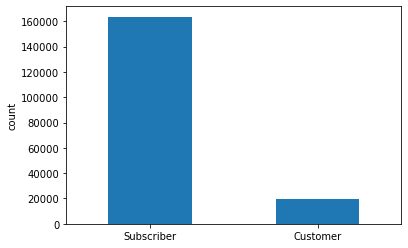

In [38]:
df.user_type.value_counts().plot(kind='bar');
plt.xticks(rotation=0);
plt.ylabel('count');

In [39]:
df.user_type.value_counts() / df.shape[0]

Subscriber    0.891676
Customer      0.108324
Name: user_type, dtype: float64

It is shown that there are much more subscribers than customers. 89% of demands come from subscribers, while 11% come from customers.

#### User Age
Below we'll show the distribution of the user age.

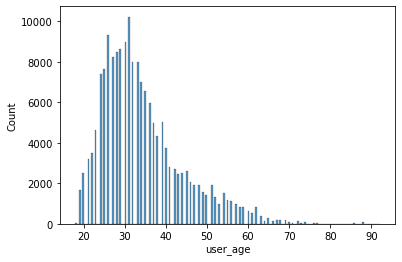

In [40]:
sb.histplot(df.user_age);

Distribution of user age seems to be right-skewed, with most users being around 30 years old. Also, with the right-skewedness, it shows that older age users are observed more than younger age users.

To try to remove the right-skewedness, below then I'll transform the histogram to log scale.

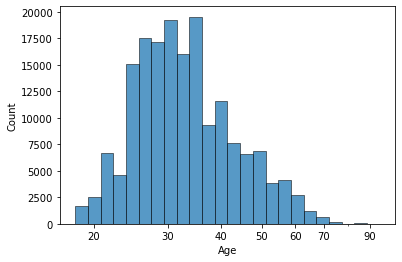

In [41]:
bins_size_log = 0.03
bins = 10 ** np.arange(np.log10(df.user_age.min() + 0.1), np.log10(df.user_age.max()) + bins_size_log, bins_size_log)
sb.histplot(df.user_age, bins=bins)
plt.xscale('log')
plt.xlabel('Age');
ticks = [20, 30, 40, 50, 60, 70, 90]
plt.xticks(ticks, ticks);

The distribution in log scale is still right skewed, so hence it is decided to not use the log scale for user age and keep its original linear scale.

In conclusion, the distribution of age shows that most users are around 30 years old, with older users observed more than younger users.

#### User Gender
Below histogram shows the distribution of user gender.

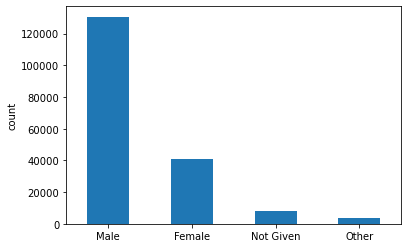

In [42]:
df.user_gender.value_counts().plot(kind='bar', rot=0);
plt.ylabel('count');

In [43]:
df.user_gender.value_counts() / df.shape[0]

Male         0.712336
Female       0.222690
Not Given    0.045062
Other        0.019911
Name: user_gender, dtype: float64

The data shows that there is much higher percentage of male than female users, with "other" gender being the lowest. 71% are males, 22% are females, 4.5% are not given, and 2% are "other" gender.

### Booking Location

#### Station Popularity
Below we'll plot the sorted value counts of the start and end station ID and name. Purpose of this plot is to see whether any station is much more popular than the other. The exact station name/ID does not matter here, because we only care about the distribution. Hence the station name/ID is not shown in the graph for clarity.

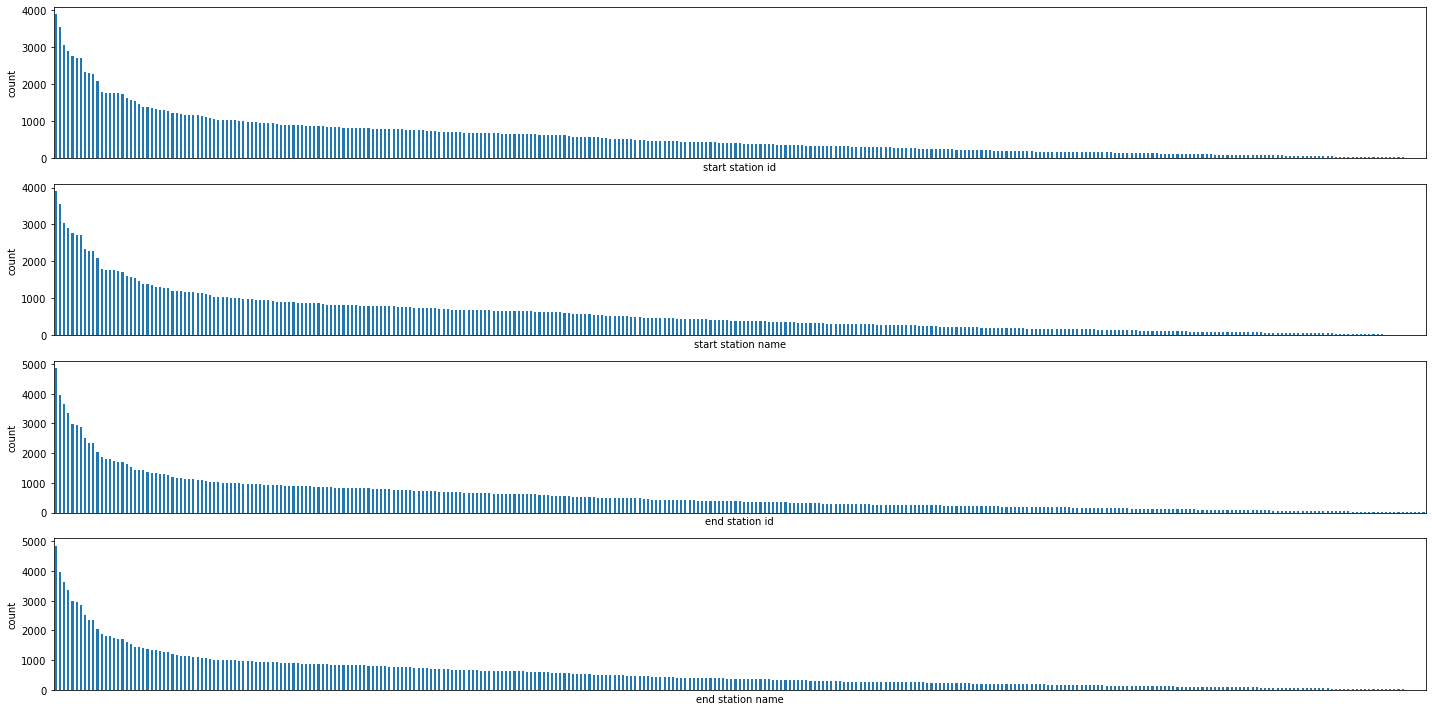

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(4, 1, 1)
df.start_station_id.value_counts().plot(kind='bar', xticks=[], xlabel='start station id', ylabel='count');
plt.subplot(4, 1, 2)
df.start_station_name.value_counts().plot(kind='bar', xticks=[], xlabel='start station name', ylabel='count');
plt.subplot(4, 1, 3)
df.end_station_id.value_counts().plot(kind='bar', xticks=[], xlabel='end station id', ylabel='count');
plt.subplot(4, 1, 4)
df.end_station_name.value_counts().plot(kind='bar', xticks=[], xlabel='end station name', ylabel='count');
plt.tight_layout();

As can be seen above, the distribution is smoothly decreasing. This shows that indeed some stations are much more popular than the others.

#### Station Clustered Regions

Below I'll show the distribution of the station latitude and longitude, with the purpose to see whether the station locations can be clustered into regions or not.

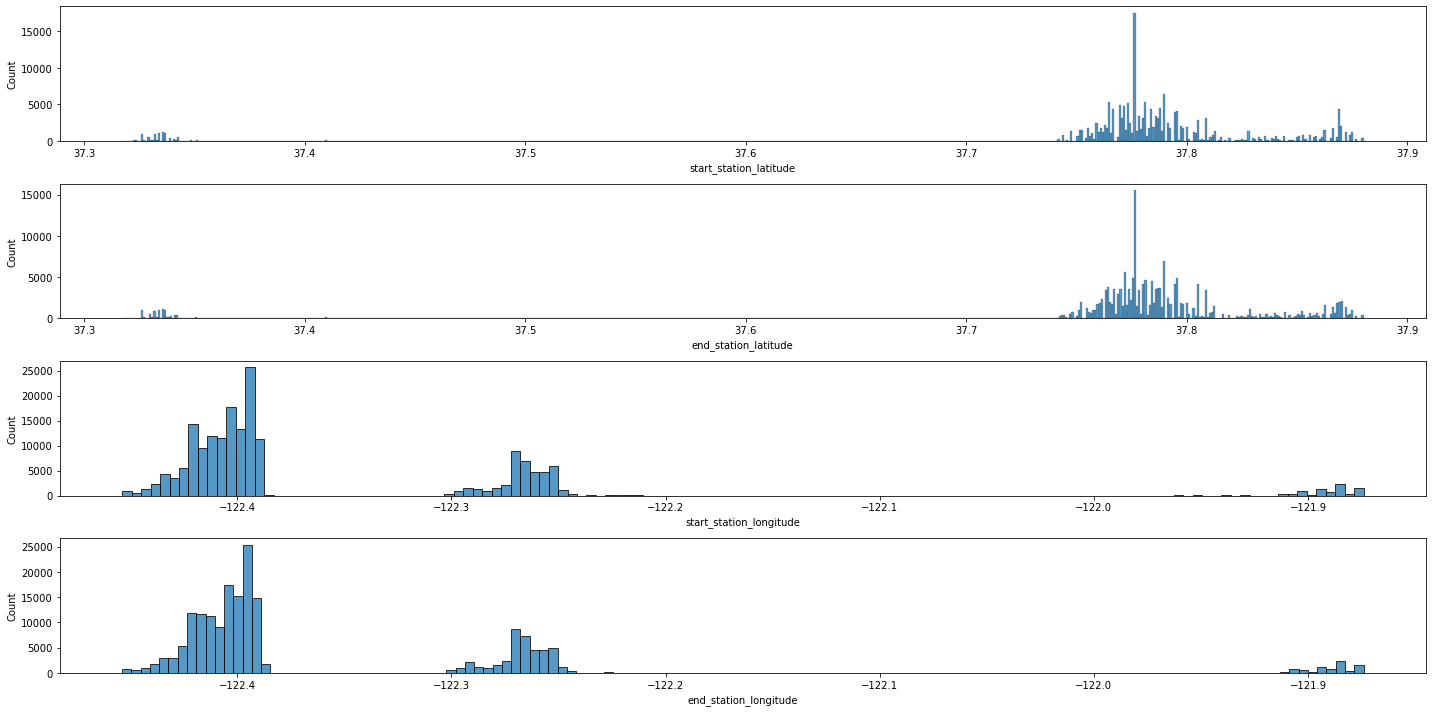

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(4, 1, 1)
sb.histplot(df.start_station_latitude)
plt.subplot(4, 1, 2)
sb.histplot(df.end_station_latitude)
plt.subplot(4, 1, 3)
sb.histplot(df.start_station_longitude)
plt.subplot(4, 1, 4)
sb.histplot(df.end_station_longitude)
plt.tight_layout();

From the histogram above, it seems that the stations are clustered into multiple regions. To be clearer, below I'll plot the 2D map of the start station locations based on their latitudes and longitudes (end stations are more or less similar, so will not be shown here).

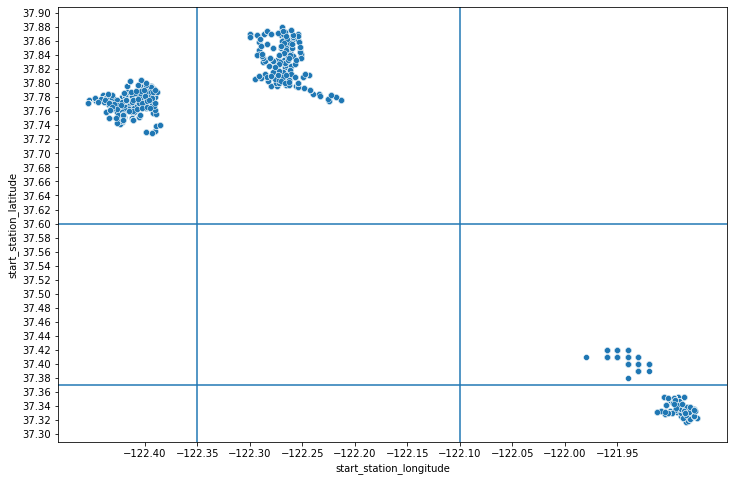

In [46]:
plt.figure(figsize=(12,8))
sb.scatterplot(data=df, x='start_station_longitude', y='start_station_latitude')
plt.yticks(np.arange(37.3, 37.9, 0.02));
plt.xticks(np.arange(-122.4, -121.9, 0.05), rotation=0);
plt.axhline(37.37)
plt.axhline(37.6)
plt.axvline(-122.35)
plt.axvline(-122.1);

From the map above, it can be seen that the stations can be clustered into 4 regions. First, we'll cluster the latitudes into 3 regions: North, Middle, and South, which are separated at latitudes of 37.37 and 37.6. Then we'll cluster the longitudes into 3 regions: West, Middle, and East, which are separated at longitudes of -122.35 and -122.1. Then afterward, we'll combine the station latitude and longitude categories created above to be the station region column for both start and end stations. This is done in the Feature Engineering section at the beginning of this notebook. This then gives the following list of station regions:
- NorthWest
- NorthMiddle
- MiddleEast
- SouthEast

Below code shows the regions in code.

In [47]:
df.start_station_region.cat.categories

Index(['NorthWest', 'NorthMiddle', 'MiddleEast', 'SouthEast'], dtype='object')

Below then we'll plot the histogram to see the distribution of demands over these regions.

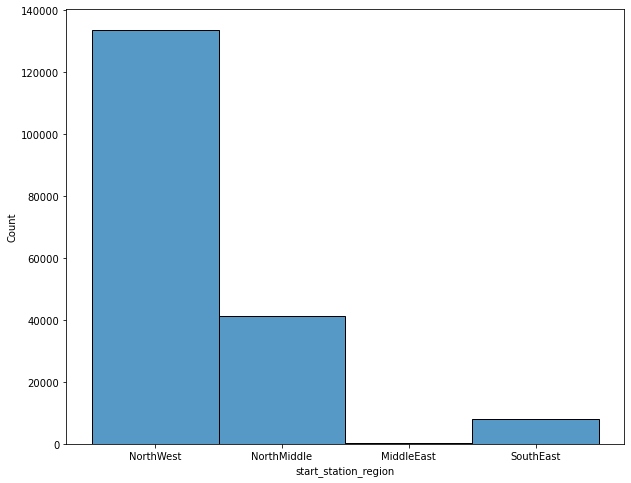

In [48]:
plt.figure(figsize=(10,8))
sb.histplot(df.start_station_region);

Based on the histogram above, it is observed that NorthWest region has the highest demand, followed by NorthMiddle, SouthEast, and lastly MiddleEast being the lowest.

Before moving on, I observed that there is a weird spike for the latitude of both start and end station. Let's investigate it to ensure that it is not an issue. We'll zoom in to the spike at around latitude of 37.77 to 37.78.

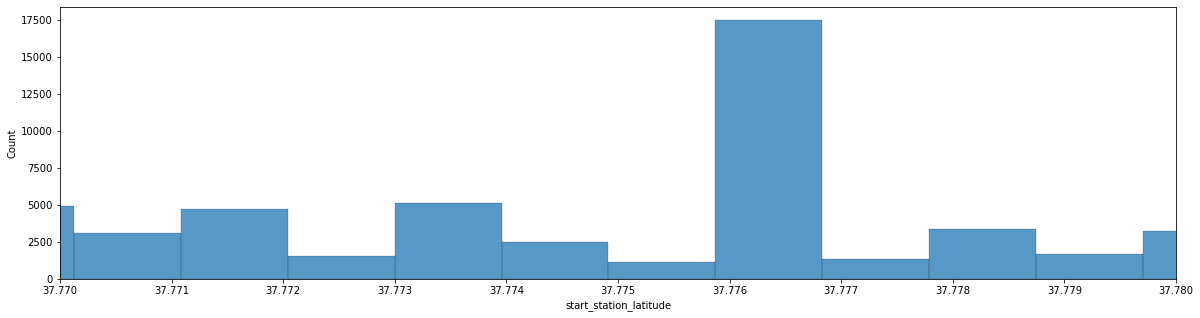

In [49]:
plt.figure(figsize=(20,5))
sb.histplot(df.start_station_latitude);
plt.xticks(ticks=np.arange(37.77, 37.79, 0.001));
plt.xlim((37.77, 37.78));
plt.ticklabel_format(useOffset=False);

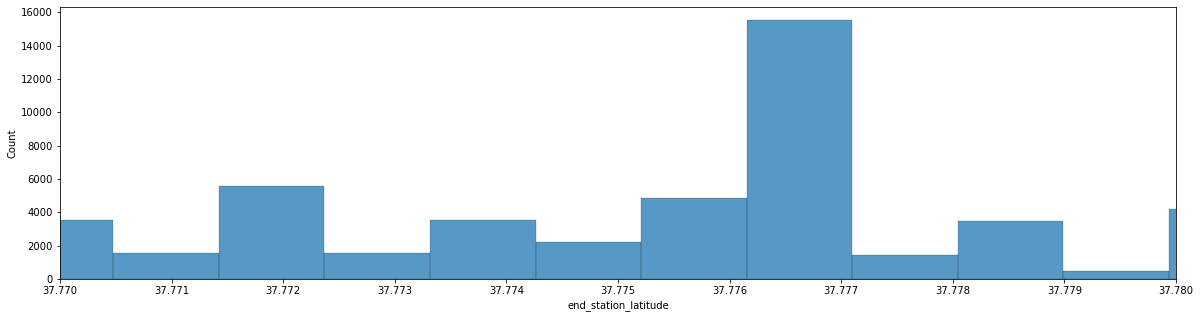

In [50]:
plt.figure(figsize=(20,5))
sb.histplot(df.end_station_latitude);
plt.xticks(ticks=np.arange(37.77, 37.79, 0.001));
plt.xlim((37.77, 37.78));
plt.ticklabel_format(useOffset=False);

From the above plot, we can see that the spike occurs between latitude of 37.776 and 37.777 for both start and end station. Now let's plot the histogram focusing only on this range.

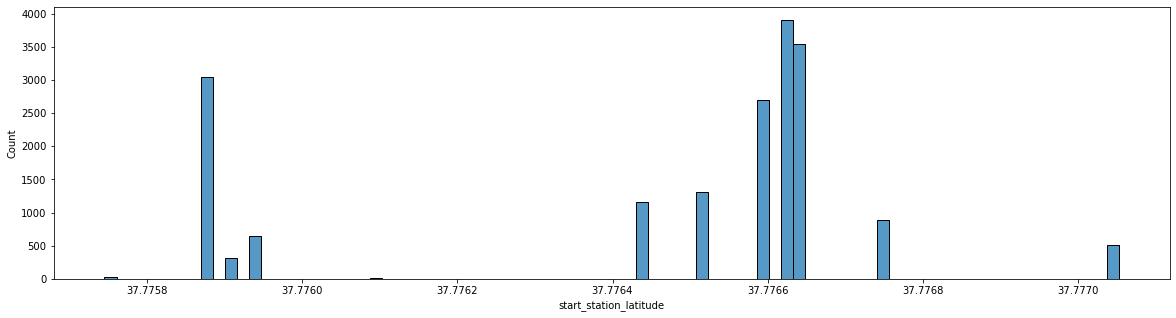

In [51]:
idx = (df.start_station_latitude >= 37.7757) & (df.start_station_latitude <= 37.7773)
plt.figure(figsize=(20,5))
sb.histplot(df.start_station_latitude[idx]);
plt.ticklabel_format(useOffset=False);

Below we'll print the rows that corresponds to start station latitude between 37.7766 and 37.7762 (these values are obtained after zooming in further on the histogram above).

In [52]:
idx = (df.start_station_latitude >= 37.77660) & (df.start_station_latitude <= 37.77662)
df[idx]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration,duration_sec_log,user_age,user_age_category,start_station_latitude_category,end_station_latitude_category,start_station_longitude_category,end_station_longitude_category,start_station_region,end_station_region
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58,Market St at 10th St,37.776619,-122.417385,145,29th St at Church St,37.743684,...,0 days 00:17:46,3.027757,27,25-30,North,North,West,West,NorthWest,NorthWest
54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58,Market St at 10th St,37.776619,-122.417385,62,Victoria Manalo Draves Park,37.777791,...,0 days 00:06:41,2.603144,29,25-30,North,North,West,West,NorthWest,NorthWest
110,371,2019-02-28 23:01:15.077,2019-02-28 23:07:26.459,58,Market St at 10th St,37.776619,-122.417385,98,Valencia St at 16th St,37.765052,...,0 days 00:06:11,2.569374,25,< 25,North,North,West,West,NorthWest,NorthWest
114,376,2019-02-28 23:00:05.223,2019-02-28 23:06:21.515,58,Market St at 10th St,37.776619,-122.417385,21,Montgomery St BART Station (Market St at 2nd St),37.789625,...,0 days 00:06:16,2.575188,37,30s,North,North,West,West,NorthWest,NorthWest
190,515,2019-02-28 22:28:11.347,2019-02-28 22:36:46.389,58,Market St at 10th St,37.776619,-122.417385,321,5th St at Folsom,37.780146,...,0 days 00:08:35,2.711807,38,30s,North,North,West,West,NorthWest,NorthWest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183362,899,2019-02-01 01:08:39.015,2019-02-01 01:23:38.798,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,...,0 days 00:14:59,2.953760,20,< 25,North,North,West,West,NorthWest,NorthWest
183364,892,2019-02-01 01:08:43.731,2019-02-01 01:23:35.763,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,...,0 days 00:14:52,2.950365,19,< 25,North,North,West,West,NorthWest,NorthWest
183365,932,2019-02-01 01:07:51.908,2019-02-01 01:23:24.370,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,...,0 days 00:15:32,2.969416,19,< 25,North,North,West,West,NorthWest,NorthWest
183366,932,2019-02-01 01:07:49.971,2019-02-01 01:23:22.528,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,...,0 days 00:15:32,2.969416,19,< 25,North,North,West,West,NorthWest,NorthWest


The start station name is "Market St at 10th St". This is then expected since it's a market area, where high bike demand is very likely. The spike in the histogram is then not an issue.

In conclusion, the distribution shows that there are 4 clusters of location where the bike demands are high, which are NorthWest, NorthMiddle, MiddleEast, and SouthEast region. As for the bike demands, it is observed that NorthWest region has the highest demand, followed by NorthMiddle, SouthEast, and lastly MiddleEast being the lowest.

### Booking Time

#### Demand Trend within the Month
Below we'll plot the distribution of the date of the start and end time.

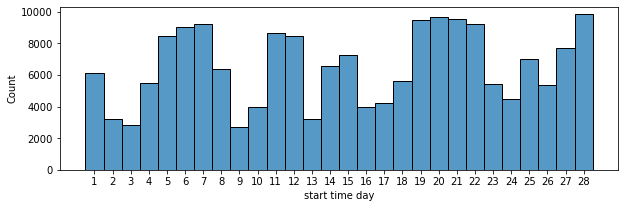

In [53]:
plt.figure(figsize=(10,3))
sb.histplot(df.start_time.dt.day, discrete=True)
plt.xlabel('start time day');
plt.xticks(np.arange(1, 29));

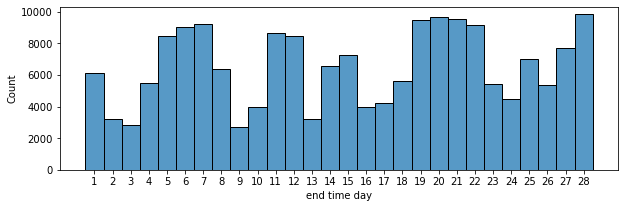

In [54]:
plt.figure(figsize=(10,3))
sb.histplot(df.end_time.dt.day, discrete=True)
plt.xlabel('end time day');
plt.xticks(np.arange(1, 29));

The plot above shows there is some sort of weekly trend of the bike demands.

#### Demand Day-of-the-Week Trend
Below we'll plot the histogram of the day of week of the start and end times.

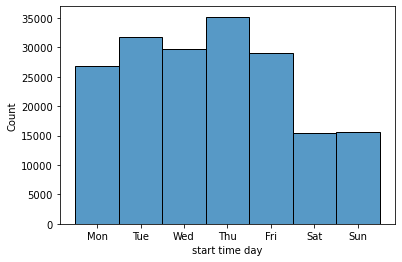

In [55]:
sb.histplot(df.start_time.dt.dayofweek, discrete=True)
plt.xlabel('start time day');
plt.xticks(np.arange(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat', 'Sun']);

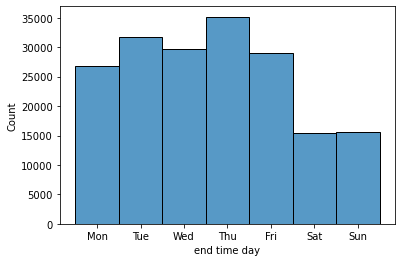

In [56]:
sb.histplot(df.end_time.dt.dayofweek, discrete=True)
plt.xlabel('end time day');
plt.xticks(np.arange(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat', 'Sun']);

From the plot above, we can see that demands are lower on the weekends and higher on the weekdays.

#### Demand Hourly Trend
Below we'll plot the histogram of the hour of the start and end time.

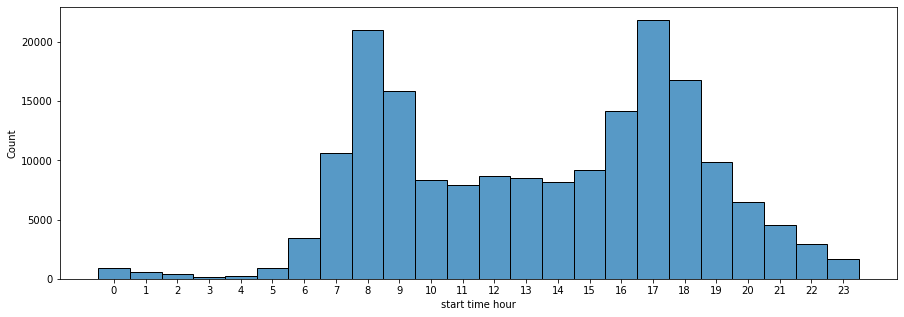

In [57]:
plt.figure(figsize=(15,5))
sb.histplot(df.start_time.dt.hour, discrete=True)
plt.xlabel('start time hour');
ticks = np.arange(0, 24, 1)
plt.xticks(ticks);

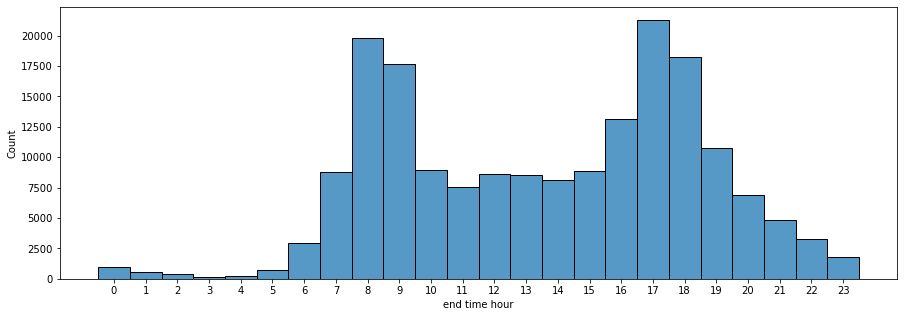

In [58]:
plt.figure(figsize=(15,5))
sb.histplot(df.end_time.dt.hour, discrete=True)
plt.xlabel('end time hour');
ticks = np.arange(0, 24, 1)
plt.xticks(ticks);

The distributions above shows that there are 2 peak hours during the day, which is around 08:00 and 17:00.

#### Demand Minute-ly Trend
Below we'll plot the histogram of the minute of the start and end time.

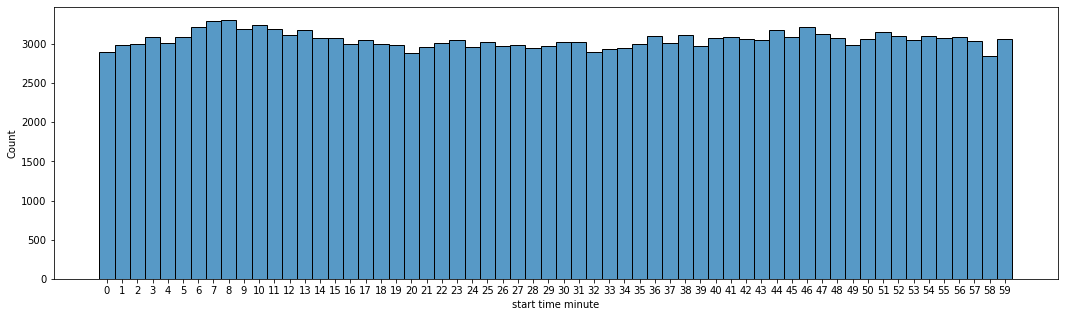

In [59]:
plt.figure(figsize=(18,5))
sb.histplot(df.start_time.dt.minute, discrete=True)
plt.xlabel('start time minute');
ticks = np.arange(0, 60, 1)
plt.xticks(ticks);

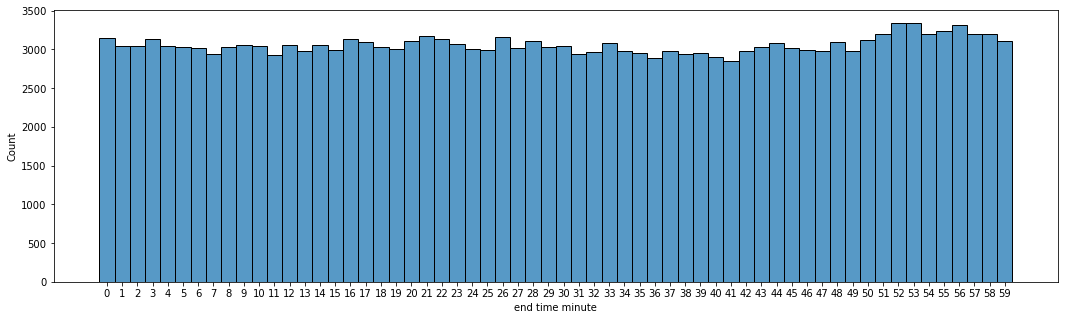

In [60]:
plt.figure(figsize=(18,5))
sb.histplot(df.end_time.dt.minute, discrete=True)
plt.xlabel('end time minute');
ticks = np.arange(0, 60, 1)
plt.xticks(ticks);

Over the minutes, the bike demands are uniformly distributed, showing no periodic use of the bike within every hour.

### Discussion
#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For the duration variable, the distribution was highly right skewed. I had to do log scale transformation to the variable. It was then observed that the duration has log-normal distribution, centered around 515.95 seconds, with a slight amount of right skewedness.

As for the user demography:
- There are much more demands from subscibers than customers. 89% of the bike demands are from subscribers, while 11% are from customers.
- User age has right-skewed distribution. Most users are around 30 years old, with older users observed more than younger users.
- There is much higher percentage of male than female users, with "other" gender being the lowest. 71% are males, 22% are females, 4.5% are not given, and 2% are "other" gender.

As for booking location:
- Some stations are observed to be more popular than the others, shown by exponentially decreasing sorted value counts of the station name/ID.
- The station locations are observed to be clustered into 4 regions: NorthWest, NorthMiddle, MiddleEast, and SouthEast.
- The NorthWest region has the highest demand, followed by NorthMiddle, SouthEast, and lastly MiddleEast being the lowest.

As for booking time:
- There is weekly trend in the bike demand within the month.
- Weekends have lower demands than weekdays.
- There are peak hours at 08:00 and 17:00 within each day.
- There is no minute-ly trend within each hour.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I added the column for duration to be in Timedelta type and also in log scale of the duration in seconds. This is to give convenience to the analysis process. The log scale is needed because the duration distribution is highly right-skewed.

I converted the user birth year column to be age, by subtracting the birth year from 2019 (the year in which this data is collected). Reason for me doing this is because age is more intuitive for analysis.

Other than that, no unusual distribution found.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### General Observation
Below we'll show the pairwise correlations.

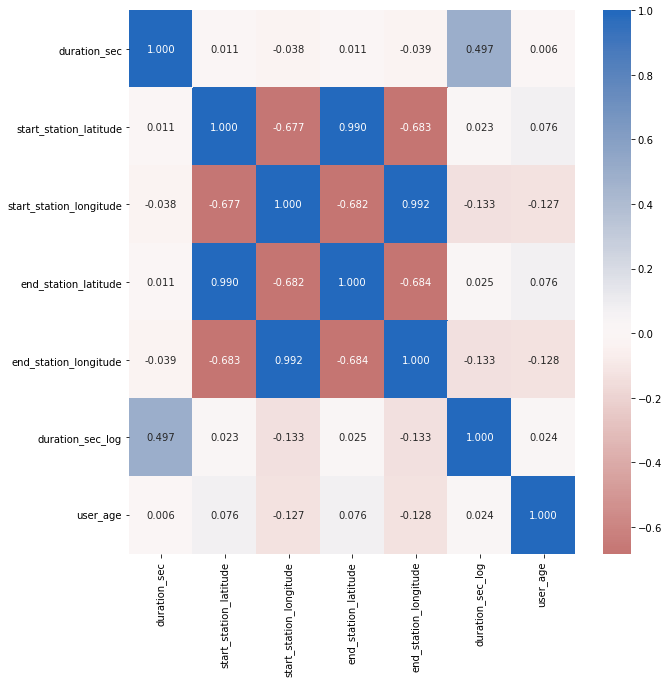

In [61]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.drop(columns=['user_birth_year', 'bike_share_for_all_trip']).corr(), center=0, cmap='vlag_r', annot=True, fmt='.3f');

From the correlation heat map above, there is no interesting relation found.

Below we'll plot pairwise scatter plots of the numeric variables.

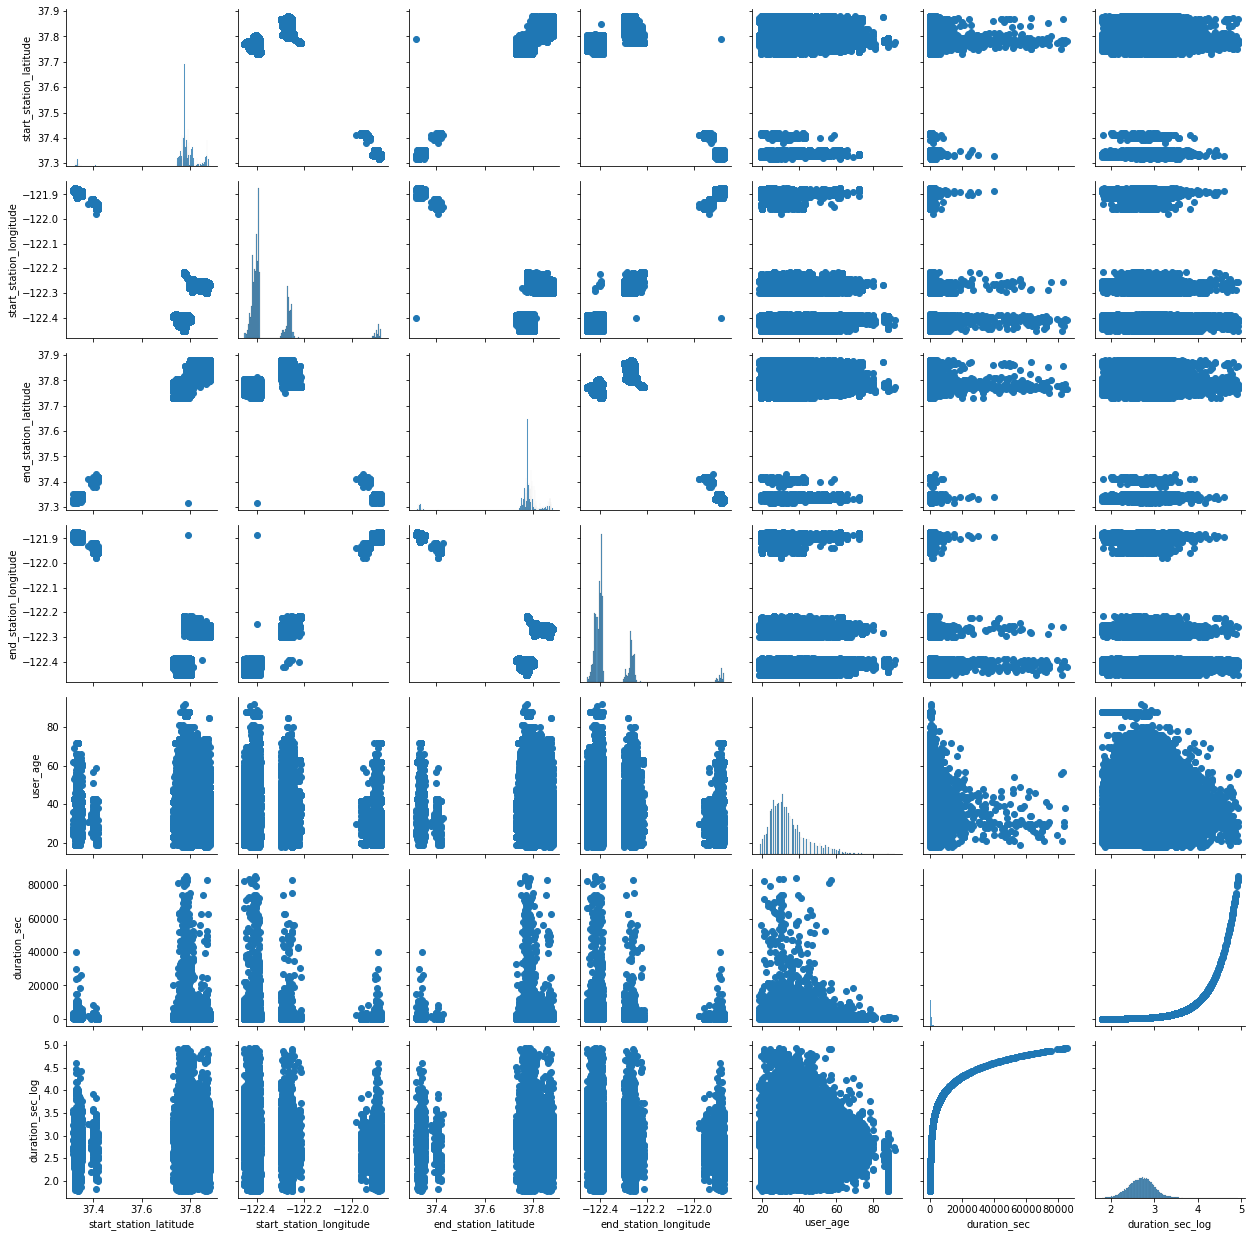

In [62]:
g = sb.PairGrid(data=df, vars=['start_station_latitude', 'start_station_longitude',
                               'end_station_latitude', 'end_station_longitude',
                               'user_age', 'duration_sec', 'duration_sec_log'], dropna=True)
g.map_offdiag(plt.scatter)
g.map_diag(sb.histplot)

One interesting pattern here is between duration distribution and user age. There seems to be decreasing duration as age increases.

Different duration distribution is also observed at different station location (latitude/longitude). There is also change of user age distribution with different station location, which might indirectly caused the different distribution of duration at different station locations.

The obvious pattern in the scatter plot between duration_sec and duration_sec_log can be ignored, as they are simply log transformation of each other.

### Duration vs User Demography

#### User Type
Below we'll plot the distribution of duration (in log scale) for each user type.

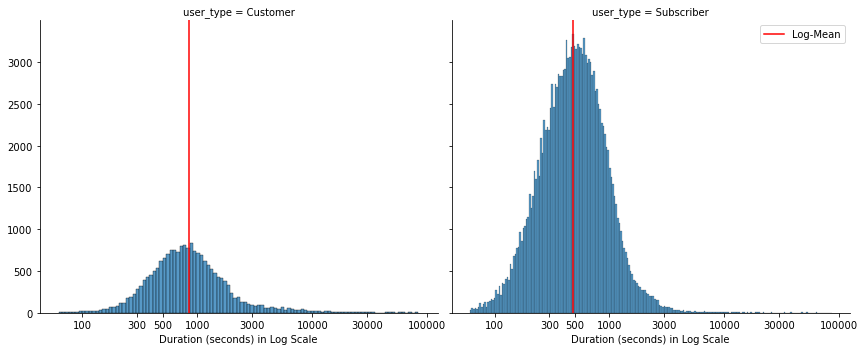

In [63]:
g = sb.FacetGrid(data=df, col='user_type', height=5, aspect=1.2)
g.map(sb.histplot, 'duration_sec_log');
g.set_xlabels('Duration (seconds) in Log Scale');

xticks_labels = [100, 300, 500, 1000, 3000, 10000, 30000, 100000]
xticks = np.log10(xticks_labels)
for ax in g.axes.squeeze():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_labels)
    if 'Customer' in ax.title.get_text():
        ax.axvline(df.query('user_type == "Customer"').duration_sec_log.mean(), color='red', label='Log-Mean')
    else:
        ax.axvline(df.query('user_type == "Subscriber"').duration_sec_log.mean(), color='red', label='Log-Mean')
        
plt.legend();

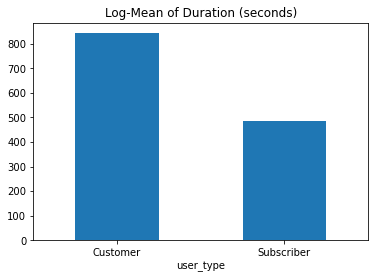

In [64]:
(10 ** df.groupby('user_type').duration_sec_log.mean()).plot(kind='bar', rot=0)
plt.title('Log-Mean of Duration (seconds)');

In [65]:
mean = 10**df.query('user_type == "Customer"').duration_sec_log.mean()
print(f'Log-mean of duration for customers is {mean:.3f} seconds.')

Log-mean of duration for customers is 842.375 seconds.


In [66]:
mean = 10**df.query('user_type == "Subscriber"').duration_sec_log.mean()
print(f'Log-mean of duration for subscribers is {mean:.3f} seconds.')

Log-mean of duration for subscribers is 486.118 seconds.


Observation from the graphs above:
- Both the customers and subscribers have log-normal distribution for their duration.
- Customers in general rent the bike for longer duration than subscribers. This is shown by the mean of the log-duration being higher for customers than for subscribers, i.e. 842.375 seconds for customers vs 486.118 seconds for subscribers, almost double.

#### User Age
Below we'll plot the duration (in log scale) against user age.

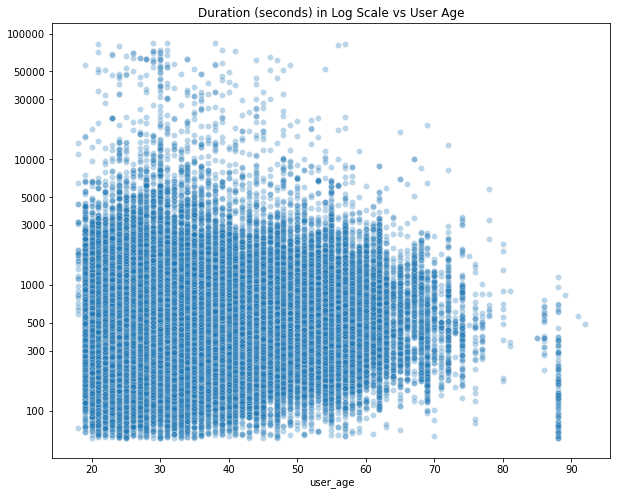

In [67]:
plt.figure(figsize=(10,8))
sb.scatterplot(data=df, x='user_age', y='duration_sec_log', alpha=0.3);
plt.title('Duration (seconds) in Log Scale vs User Age');
ytick_labels = [100, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000, 100000]
yticks = np.log10(ytick_labels)
plt.yticks(ticks=yticks, labels=ytick_labels);
plt.ylabel('');

It can be seen above that as user age increases, the duration distribution decreases to lower values. Younger users tend to rent the bike for longer duration than older users.

Below we'll plot the distribution of duration for each age category.

Text(0.5, 1.0, 'Duration (seconds) in Log Scale vs User Age Category')

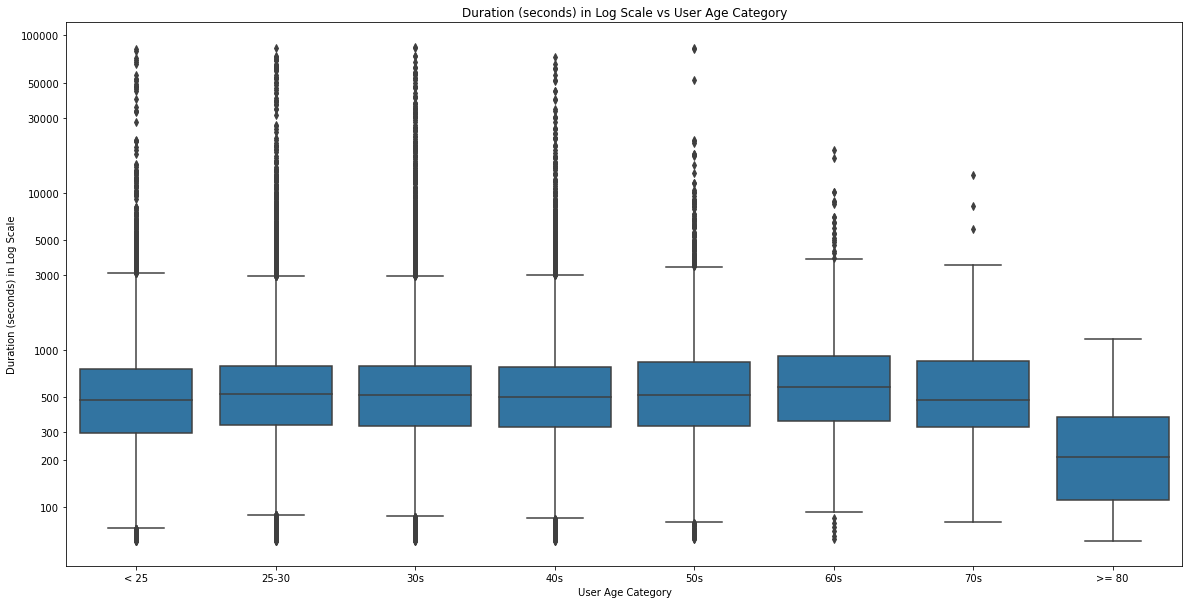

In [68]:
plt.figure(figsize=(20,10))
sb.boxplot(data=df, x='user_age_category', y='duration_sec_log', color=sb.color_palette()[0]);
ytick_labels = [100, 200, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000, 100000]
yticks = np.log10(ytick_labels)
plt.yticks(ticks=yticks, labels=ytick_labels);
plt.ylabel('Duration (seconds) in Log Scale')
plt.xlabel('User Age Category');
plt.title('Duration (seconds) in Log Scale vs User Age Category')

Observations from the boxplot above:
- Users in the 60s age category tend to rent the bike for the longest duration compared to the other age categories.
- For users below 60 years old, the distribution of the duration are more or less similar, which ranges from 100 to 3000 seconds (excluding outliers).
- For users above 60 years old, the non-outlier-maximum duration gets lower, showing less tendency to rent the bike with long duration.
- For above 80 years old, the duration in general is lower than (is approximately half of) the duration of users younger than 80 years old.

#### User Gender

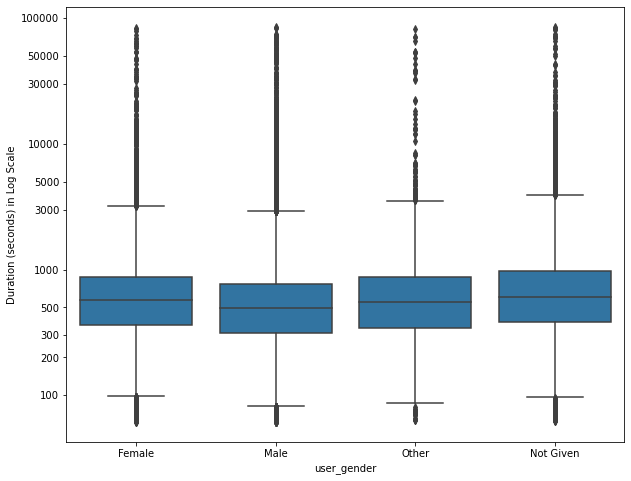

In [69]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df, x='user_gender', y='duration_sec_log', color=sb.color_palette()[0])
ytick_labels = [100, 200, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000, 100000]
yticks = np.log10(ytick_labels)
plt.yticks(ticks=yticks, labels=ytick_labels);
plt.ylabel('Duration (seconds) in Log Scale');

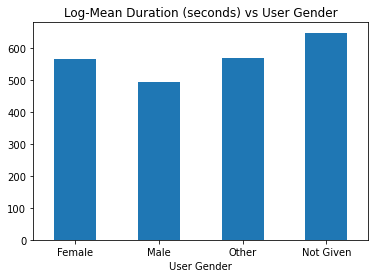

In [70]:
(10**df.groupby('user_gender').duration_sec_log.mean()).plot(kind='bar')
plt.xticks(rotation=0);
plt.title('Log-Mean Duration (seconds) vs User Gender');
plt.xlabel('User Gender');

In [71]:
(10**df.groupby('user_gender').duration_sec_log.mean())

user_gender
Female       565.957157
Male         492.652211
Other        570.729604
Not Given    648.447405
Name: duration_sec_log, dtype: float64

Observations:
- Users without given gender generally rent the bike for longer duration than the other genders.
- Females and "other" gender users generally rent the bike for around 1 minute longer than male users.

### Duration vs Booking Location Region

We'll focus our attention on start station location because the "start" is where the user resides. We'll also only interested in the start station region, because the region should already represent the best grouping of the station latitudes and longitudes. Below then we'll plot duration vs start station region:

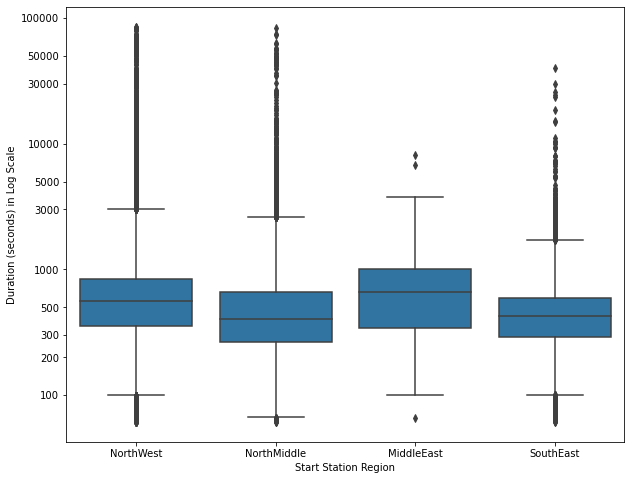

In [72]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df, x='start_station_region', y='duration_sec_log', color=sb.color_palette()[0]);
ytick_labels = [100, 200, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000, 100000]
yticks = np.log10(ytick_labels)
plt.yticks(ticks=yticks, labels=ytick_labels);
plt.ylabel('Duration (seconds) in Log Scale');
plt.xlabel('Start Station Region');

Observations:
- MiddleEast regions tend to have the longest bike rent duration in general, followed by NorthWest region.
- NorthMiddle region tend to have longer bike rent duration then SouthEast region in general (even though the SouthEast region has a little higher median than NorthMiddle, the maximum-non-outlier duration of NorthMiddle is still higher than SouthEast).

### Duration vs Booking Start Time

#### Day of Month
Below we'll see how duration is distributed for each day of month of the start time.

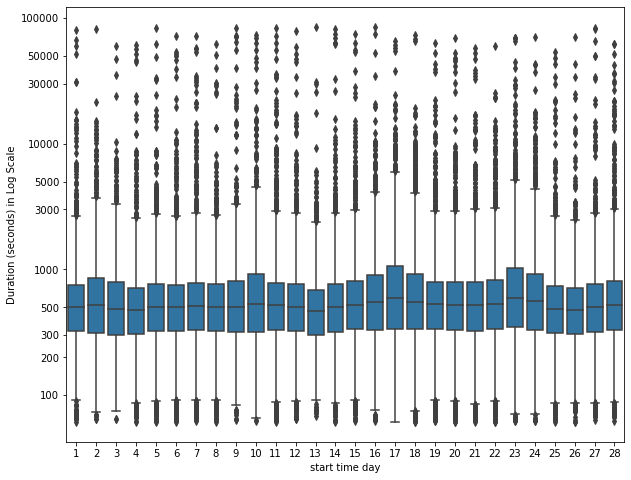

In [73]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df, x=df.start_time.dt.day, y='duration_sec_log', color=sb.color_palette()[0])
plt.xlabel('start time day');
ytick_labels = [100, 200, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000, 100000]
yticks = np.log10(ytick_labels)
plt.yticks(ticks=yticks, labels=ytick_labels);
plt.ylabel('Duration (seconds) in Log Scale');

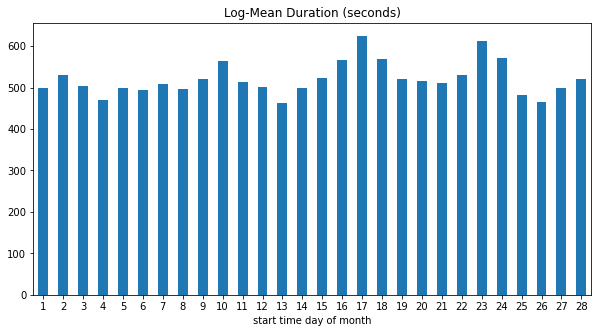

In [74]:
plt.figure(figsize=(10, 5))
(10**df.groupby(df.start_time.dt.day).duration_sec_log.mean()).plot(kind='bar');
plt.title('Log-Mean Duration (seconds)')
plt.xticks(rotation=0);
plt.xlabel('start time day of month');

Observation: There seems to be a weekly trend where the mean duration goes up.

#### Day of Week
Next we'll see how duration is distributed for each day of week of the start time.

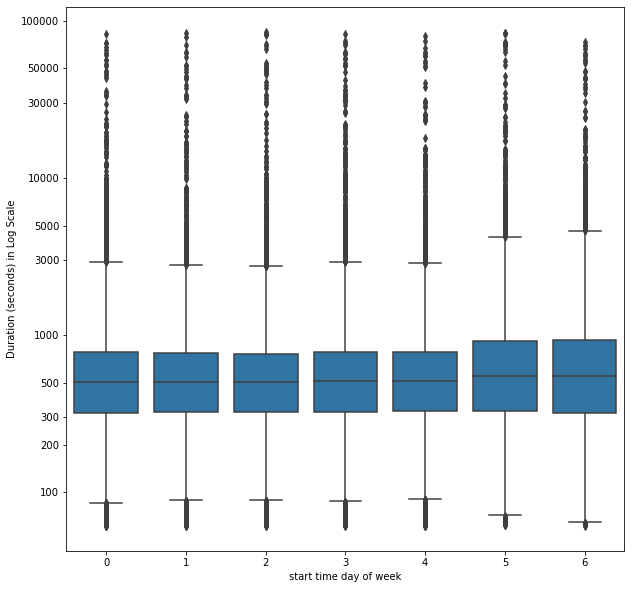

In [75]:
plt.figure(figsize=(10,10))
sb.boxplot(data=df, x=df.start_time.dt.dayofweek, y='duration_sec_log', color=sb.color_palette()[0])
plt.xlabel('start time day of week');
ytick_labels = [100, 200, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000, 100000]
yticks = np.log10(ytick_labels)
plt.yticks(ticks=yticks, labels=ytick_labels);
plt.ylabel('Duration (seconds) in Log Scale');

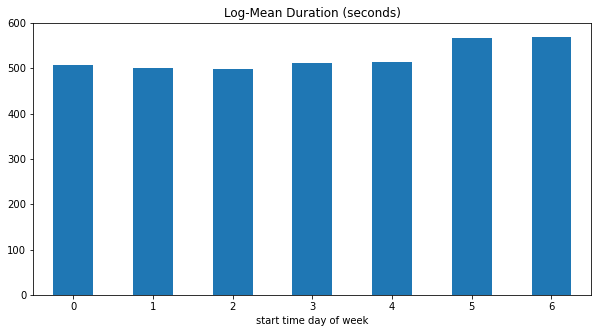

In [76]:
plt.figure(figsize=(10, 5))
(10**df.groupby(df.start_time.dt.dayofweek).duration_sec_log.mean()).plot(kind='bar');
plt.title('Log-Mean Duration (seconds)')
plt.xticks(rotation=0);
plt.ylim((0, 600));
plt.xlabel('start time day of week');

Observation: It seems that the bike rent duration is generally longer during the weekend, where the non-outlier-maximum duration during the weekend is around 5000 seconds while for the weekdays it is around 3000 seconds.

#### Hour of Day
Next we'll see how duration is distributed for each hour of the day of the start time.

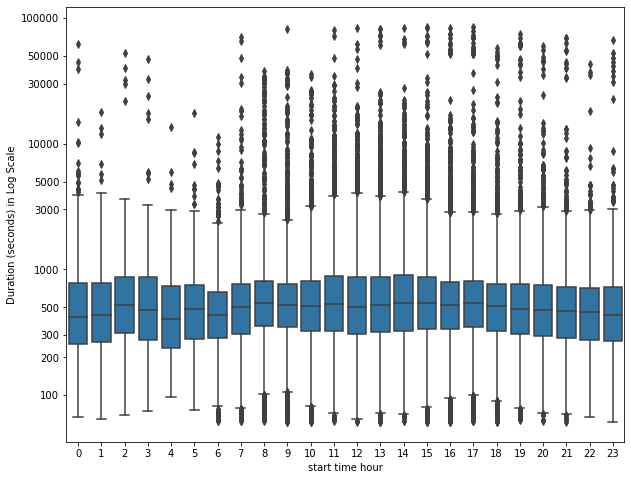

In [77]:
plt.figure(figsize=(10,8))
start_time_hour = df.start_time.dt.hour
sb.boxplot(data=df, x=start_time_hour, y='duration_sec_log', color=sb.color_palette()[0])
plt.xlabel('start time hour');
ytick_labels = [100, 200, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000, 100000]
yticks = np.log10(ytick_labels)
plt.yticks(ticks=yticks, labels=ytick_labels);
plt.ylabel('Duration (seconds) in Log Scale');

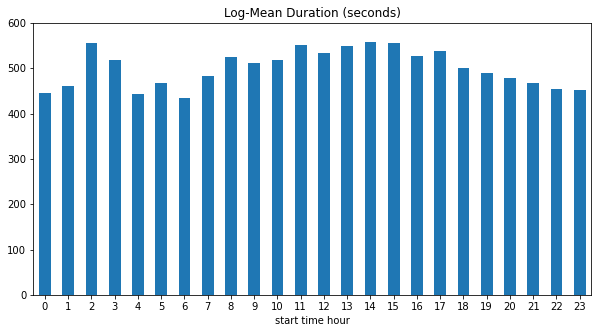

In [78]:
plt.figure(figsize=(10, 5))
(10**df.groupby(df.start_time.dt.hour).duration_sec_log.mean()).plot(kind='bar');
plt.title('Log-Mean Duration (seconds)')
plt.xticks(rotation=0);
plt.ylim((0, 600));
plt.xlabel('start time hour');

Observation: The rent duration during middle of the day, around 11:00 to 15:00, is generally longer than the rest of the day, shown by the non-outlier-maximum during those hours being higher than the rest. Rent duration during midnight is also as high as middle, and this is suspected to be due to the bike being rented overnight and only returned in the morning.

### (Non-Main Feature Exploration) User Age vs Booking Location Region

Below we'll see the distribution of user age for each booking location region.

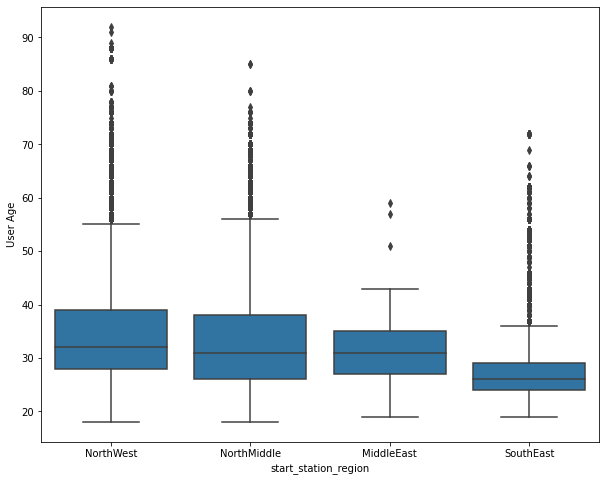

In [79]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df, x='start_station_region', y='user_age', color=sb.color_palette()[0]);
plt.ylabel('User Age');

It can be seen that the users in SouthEast region are generally younger than the users in the other regions, where the age ranges from around 20 to 35 years old. As for NorthMiddle and NorthWest region, the user age distribution is roughly similar (ignoring outliers), where the age generally ranges from 20 to 55 years old. MiddleEast region users are in general older than SouthEast region and younger than the NorthMiddle and NorthWest region, where the age ranges from 20 to 45 years old.

### (Non-Main Feature Exploration) Booking Start Time vs User Age Category

#### Day of Month
Below we'll see the different preference of booking start time day of month of different user age categories.

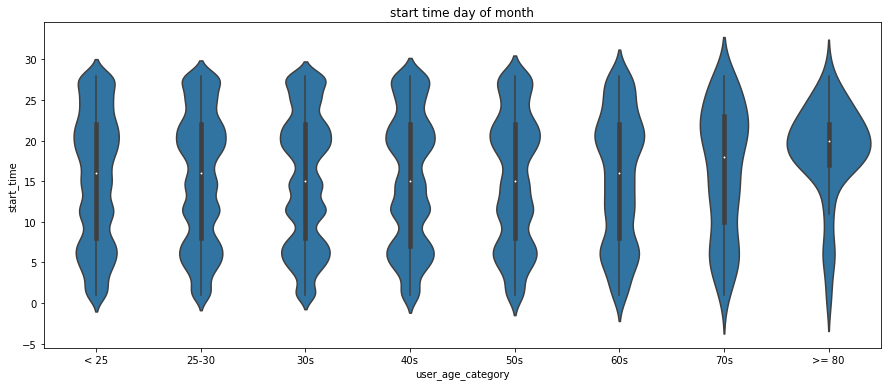

In [80]:
plt.figure(figsize=(15,6))
sb.violinplot(data=df, x='user_age_category', y=df.start_time.dt.day, color=sb.color_palette()[0])
plt.title('start time day of month');

From the above graph, it can be seen that there is generally constant bike demand for the whole month from users that are younger than 80 years old. For these users, they might be using the bike for their daily activities. As for users older than 80 years old, we start to observe that they only occasionally rent the bike, possibly for occasional recreation purpose.

#### Day of Week
Below we'll see the different preference of booking start time day of week of different user age categories.

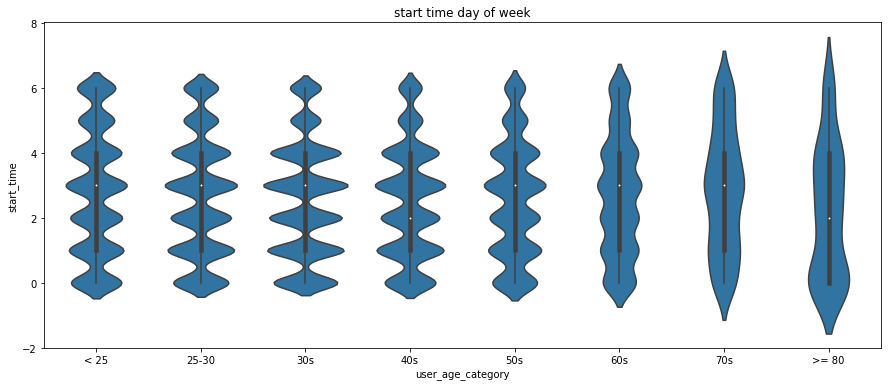

In [81]:
plt.figure(figsize=(15,6))
sb.violinplot(data=df, x='user_age_category', y=df.start_time.dt.dayofweek, color=sb.color_palette()[0])
plt.title('start time day of week');

It can be seen above that users of all age categories equally tend to rent the bike during the weekdays, and less during the weekend.

#### Hour of Day
Below we'll see the different preference of booking start time hour of day of different user age categories.

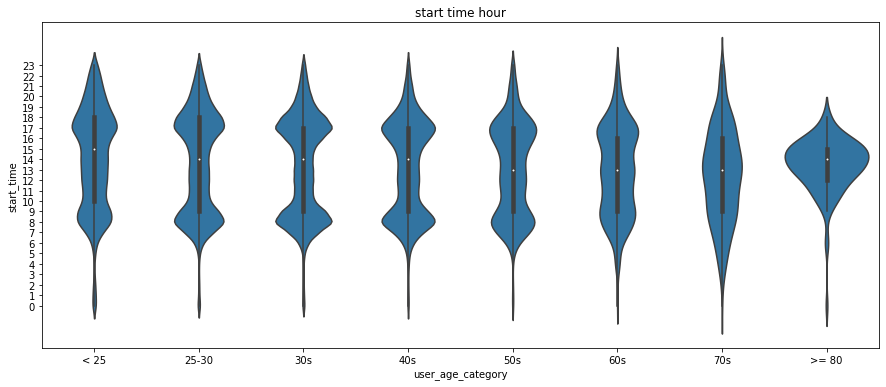

In [82]:
plt.figure(figsize=(15,6))
sb.violinplot(data=df, x='user_age_category', y=df.start_time.dt.hour, color=sb.color_palette()[0])
plt.yticks(np.arange(0, 24))
plt.title('start time hour');

As you can see from above graphs, users younger than 60 years old are generally more "scheduled", where they tend to rent the bike at beginning and end of the day (which based on the univariate exploration result of the bike rent start time, the peak hours are around 08:00 and 17:00). This is suspected to be because those people rent the bike for commuting to their workplace or school. For the users older than 60 years old, they are less scheduled, where they generally rent the bike during middle of the day, with peak around 15:00. This aligns well with our observation above that older users tend to use the bike only for recreational purpose, as opposed to younger users that might use the bike for their daily activities.

### (Non-Main Feature Exploration) Booking Start Time vs Booking Location Region

#### Day of Month
Below we'll see the different preference of booking start time day of month of different regions.

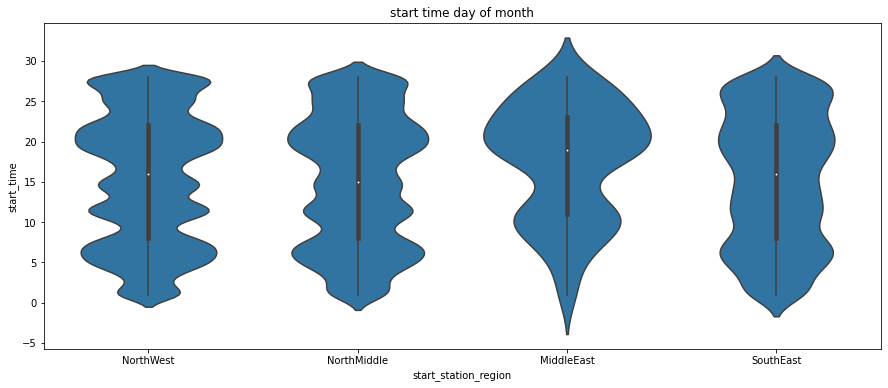

In [83]:
plt.figure(figsize=(15,6))
sb.violinplot(data=df, x='start_station_region', y=df.start_time.dt.day, color=sb.color_palette()[0])
plt.title('start time day of month');

From the graph above, it is observed that all regions, except MiddleEast, has constant demand throughout the month. The MiddleEast region seem to have unstable demand, being low at first half of the month and high at end of the month. It is possibly due to MiddleEast region being a rural area.

#### Day of Week
Below we'll see the different preference of booking start time day of week of different different regions.

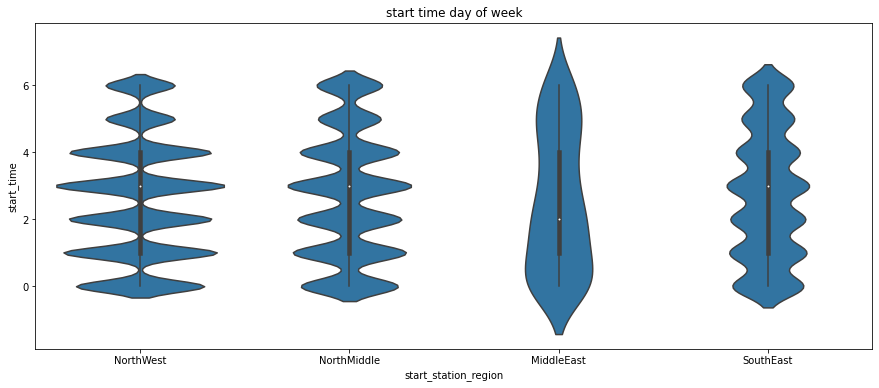

In [84]:
plt.figure(figsize=(15,6))
sb.violinplot(data=df, x='start_station_region', y=df.start_time.dt.dayofweek, color=sb.color_palette()[0])
plt.title('start time day of week');

It is observed that all regions have the same distribution of demand over the days of each week, where demand is generally higher on weekdays than on weekends.

#### Hour of Day
Below we'll see the different preference of booking start time hour of day of different different regions.

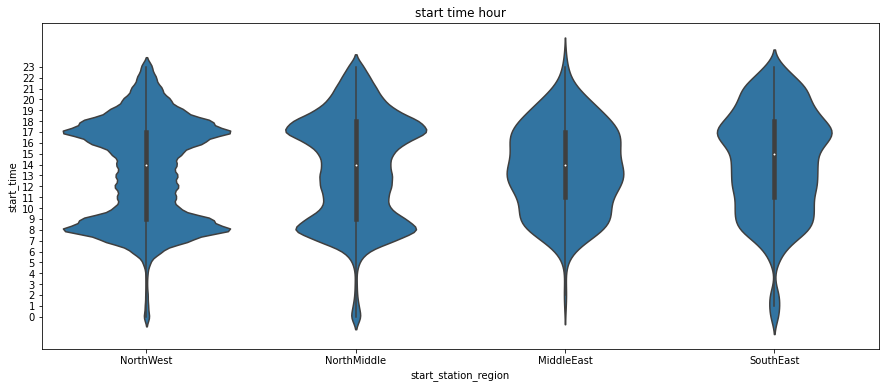

In [85]:
plt.figure(figsize=(15,6))
sb.violinplot(data=df, x='start_station_region', y=df.start_time.dt.hour, color=sb.color_palette()[0])
plt.yticks(np.arange(0, 24))
plt.title('start time hour');

It is observed that users from NorthWest and NorthMiddle regions tend to rent the bike in a more "scheduled" manner, where the demand has peak hours around 08:00 and 17:00. On the other hand, users from MiddleEast and SouthEast are less scheduled, and tend to rent the bike during middle of the day. The MiddleEast region seems to have most demands around 12:00 to 17:00. The SouthEast region seems to have a peak on 17:00, partly similar with NorthWest and NorthMiddle region.

### (Non-Main Feature Exploration) User Type vs Booking Location Region
Below we'll plot the histogram of user type for each station region.

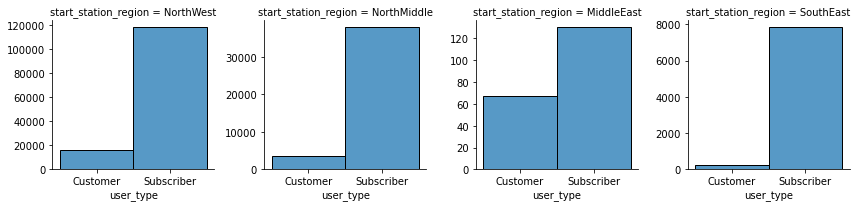

In [86]:
g = sb.FacetGrid(data=df, col='start_station_region', sharey=False)
g.map(sb.histplot, 'user_type');

It can be seen that in all regions, there are more subscribers than customers.

### Discussion
#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Duration vs user demography:
- User type:
  - Both the customers and subscribers have log-normal distribution for their duration.
  - Customers in general rent the bike for longer duration than subscribers. This is shown by the mean of the log-duration being higher for customers than for subscribers, i.e. 842.375 seconds for customers vs 486.118 seconds for subscribers, almost double.
- User age:
  - Users in the 60s age category tend to rent the bike for the longest duration compared to the other age categories.
  - For users below 60 years old, the distribution of the duration are more or less similar, which ranges from 100 to 3000 seconds (excluding outliers).
  - For users above 60 years old, the non-outlier-maximum duration gets lower, showing less tendency to rent the bike with long duration.
  - For above 80 years old, the duration in general is lower than (is approximately half of) the duration of users younger than 80 years old.
- User gender:
  - Users without given gender generally rent the bike for longer duration than the other genders.
  - Females and "other" gender generally rent the bike for around 70 seconds longer than male.

Duration vs booking location region:
- MiddleEast regions tend to have the longest bike rent duration in general, followed by NorthWest region.
- NorthMiddle region tend to have longer bike rent duration then SouthEast region in general (even though the SouthEast region has a little higher median than NorthMiddle, the maximum-non-outlier duration of NorthMiddle is still higher than SouthEast).

Duration vs booking start time:
- Day of month: there seems to be a weekly trend where the mean duration goes up.
- Day of week: it seems that the bike rent duration is generally longer during the weekend, where the non-outlier-maximum duration during the weekend is around 5000 seconds while for the weekdays it is around 3000 seconds.
- Hour of day: the rent duration during middle of the day, around 11:00 to 15:00, is generally longer than the rest of the day. Rent duration during midnight is also as high as middle, and this is suspected to be due to the bike being rented overnight and only returned in the morning.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes, I observed the relationship between user age and booking location region, between booking start time and user age category, between booking start time and booking location region, and between user type and booking location region.

User age vs booking location region:
- Users in SouthEast region are generally younger than the users in the other regions, where the age ranges from around 20 to 35 years old.
- As for NorthMiddle and NorthWest region, the user age distribution is roughly similar (ignoring outliers), where the age generally ranges from 20 to 55 years old.
- MiddleEast region users are in general older than SouthEast region and younger than the NorthMiddle and NorthWest region, where the age ranges from 20 to 45 years old.

Booking start time vs user age category:
- There is generally constant bike demand for the whole month from users that are younger than 80 years old. For these users, they might be using the bike for their daily activities. As for users older than 80 years old, we start to observe that they only occasionally rent the bike, possibly for occasional recreation purpose.
- Users of all age categories equally tend to rent the bike during the weekdays, and less during the weekend.
- Users younger than 60 years old are generally more "scheduled", where they tend to rent the bike at beginning and end of the day (which based on the univariate exploration result of the bike rent start time, the peak hours are around 08:00 and 17:00). This is suspected to be because those people rent the bike for commuting to their workplace or school. For the users older than 60 years old, they are less scheduled, where they generally rent the bike during middle of the day, with peak around 15:00. This aligns well with our observation above that older users tend to use the bike only for recreational purpose, as opposed to younger users that might use the bike for their daily activities.

Booking start time and booking location region:
- All regions, except MiddleEast, has constant demand throughout the month. The MiddleEast region seem to have unstable demand, being low at first half of the month and high at end of the month. It is possibly due to MiddleEast region being a rural area.
- All regions have the same distribution of demand over the days of each week, where demand is generally higher on weekdays than on weekends.
- Users from NorthWest and NorthMiddle regions tend to rent the bike in a more "scheduled" manner, where the demand has peak hours around 08:00 and 17:00. On the other hand, users from MiddleEast and SouthEast are less scheduled, and tend to rent the bike during middle of the day. The MiddleEast region seems to have most demands around 12:00 to 17:00. The SouthEast region seems to have a peak on 17:00, partly similar with NorthWest and NorthMiddle region.

User type and booking location region:
- In all regions, there are more subscribers than customers.

## Multivariate Exploration

### Duration vs User Type and Booking Location Region

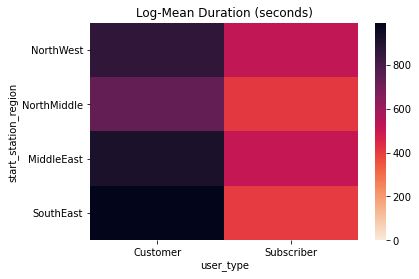

In [87]:
h = pd.pivot((10**df.groupby(['user_type', 'start_station_region']).duration_sec_log.mean()).reset_index(), index='start_station_region', columns='user_type', values='duration_sec_log')
sb.heatmap(h, cmap=sb.color_palette("rocket_r", as_cmap=True), vmin=0);
plt.title('Log-Mean Duration (seconds)');

Consistent with our findings from bivariate exploration, it is observed that, in all regions, customers tend to rent the bike for longer duration then subscribers.

### Duration vs User Type and User Age Category

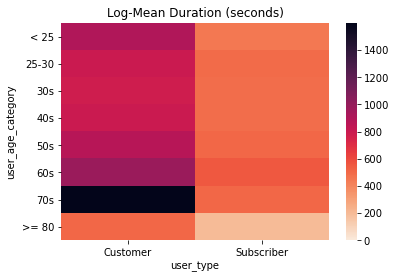

In [88]:
h = pd.pivot((10**df.groupby(['user_type', 'user_age_category']).duration_sec_log.mean()).reset_index(), index='user_age_category', columns='user_type', values='duration_sec_log')
sb.heatmap(h, cmap=sb.color_palette("rocket_r", as_cmap=True), vmin=0);
plt.title('Log-Mean Duration (seconds)');

Consistent with our findings from bivariate exploration, it is observed that, for all age categories, customers tend to rent the bike for longer duration then subscribers.

### Duration vs User Type and User Gender

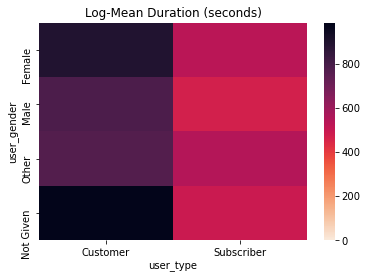

In [89]:
h = pd.pivot((10**df.groupby(['user_type', 'user_gender']).duration_sec_log.mean()).reset_index(), index='user_gender', columns='user_type', values='duration_sec_log')
sb.heatmap(h, cmap=sb.color_palette("rocket_r", as_cmap=True), vmin=0);
plt.title('Log-Mean Duration (seconds)');

Consistent with our findings from bivariate exploration, it is observed that, for all genders, customers tend to rent the bike for longer duration then subscribers.

### Duration vs User Type and Booking Time

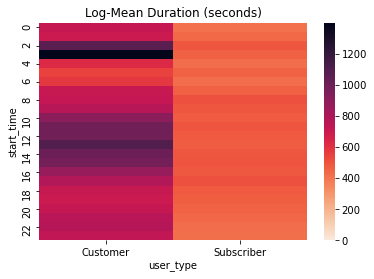

In [90]:
h = pd.pivot((10**df.groupby(['user_type', df.start_time.dt.hour]).duration_sec_log.mean()).reset_index(), index='start_time', columns='user_type', values='duration_sec_log')
sb.heatmap(h, cmap=sb.color_palette("rocket_r", as_cmap=True), vmin=0);
plt.title('Log-Mean Duration (seconds)');

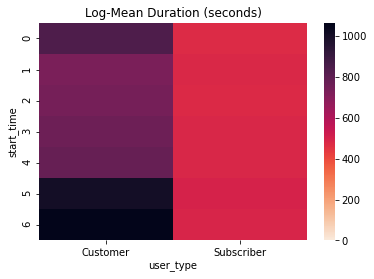

In [91]:
h = pd.pivot((10**df.groupby(['user_type', df.start_time.dt.dayofweek]).duration_sec_log.mean()).reset_index(), index='start_time', columns='user_type', values='duration_sec_log')
sb.heatmap(h, cmap=sb.color_palette("rocket_r", as_cmap=True), vmin=0);
plt.title('Log-Mean Duration (seconds)');

Consistent with our findings from bivariate exploration, it is observed that, regardless of booking start time, customers tend to rent the bike for longer duration then subscribers.

### Duration vs User Gender and User Age Category

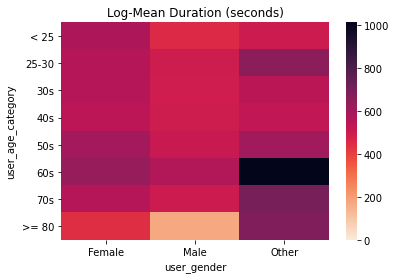

In [92]:
h = pd.pivot((10**df.groupby(['user_gender', 'user_age_category']).duration_sec_log.mean()).reset_index().dropna(), index='user_age_category', columns='user_gender', values='duration_sec_log')
sb.heatmap(h, cmap=sb.color_palette("rocket_r", as_cmap=True), vmin=0);
plt.title('Log-Mean Duration (seconds)');

Obsevations:
- Highest duration is observed for the "other" gender in the 60s age category.
- Female in general rent the bike for higher duration than male for all age categories.
- The "other" gender in general rent the bike for higher duration than the other genders for all age categories.

### Duration vs Booking Time vs Booking Location

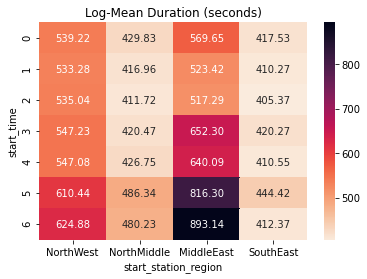

In [93]:
h = pd.pivot((10**df.groupby(['start_station_region', df.start_time.dt.dayofweek]).duration_sec_log.mean()).reset_index(), index='start_time', columns='start_station_region', values='duration_sec_log')
sb.heatmap(h, cmap=sb.color_palette("rocket_r", as_cmap=True), annot=True, fmt='.2f');
plt.title('Log-Mean Duration (seconds)');

It is observed that, in general, the bike rent duration tends to be longest in MiddleEast during the weekend. Also, the bike rent duration in MiddleEast is in general longer than the other regions for all the days of week. The second longest duration in general occurs in NorthWest region, while NortMiddle comes third and SouthEast comes last.

Consistent with earlier finding, bike rent duration tends to be the longest during weekend, regardless of the location region.

### Duration vs Booking Time vs User Age Category

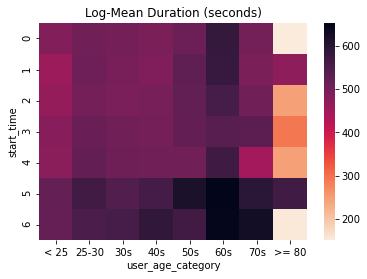

In [94]:
h = pd.pivot((10**df.groupby(['user_age_category', df.start_time.dt.dayofweek]).duration_sec_log.mean()).reset_index(), index='start_time', columns='user_age_category', values='duration_sec_log')
sb.heatmap(h, cmap=sb.color_palette("rocket_r", as_cmap=True));
plt.title('Log-Mean Duration (seconds)');

It is found that users in the 60s age category tend to rent the bike for longer duration than the other age categories throughout the whole days of week. Also, consistent with previous finding, the bike rent duration is generally longer during the weekend than weekdays, regardless of the user age categories. Just a slight difference is that the graph showing that there is low bike rent duration on Sunday for users of age category >= 80.

### Discussion
#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Duration vs user type paired with user demography, booking location, and booking time:  
- From the multivariate plots duration vs user type paired with user age, user gender, booking location, and booking time, the findings strengthened the observation that customers in general rent the bike for longer duration than subscribers, regardless of user age, gender, location, and time.

Duration vs user gender paired with user age category:
- Female in general rent the bike for higher duration than male for all age categories.
- The "other" gender in general rent the bike for higher duration than the other genders for all age categories.
- Highest duration is observed for the "other" gender in the 60s age category.

Duration vs booking time paired with booking location:
- In general, the bike rent duration tends to be longest in MiddleEast during the weekend.
- The bike rent duration in MiddleEast is in general longer than the other regions for all the days of week. The second longest duration in general occurs in NorthWest region, while NortMiddle comes third and SouthEast comes last.
- Consistent with earlier finding, bike rent duration tends to be the longest during weekend, regardless of the location region.

Duration vs booking time paired with user age category:
- Users in the 60s age category tend to rent the bike for longer duration than the other age categories throughout the whole days of week.
- Also, consistent with previous finding, the bike rent duration is generally longer during the weekend than weekdays, regardless of the user age categories. Just a slight difference is that it is observed that there is low bike rent duration on Sunday for users of age category >= 80.

#### Were there any interesting or surprising interactions between features?
The only surprising finding is that it is consistently observed that customers tend to rent the bike for longer duration than subscribers, regardless of other factors. This is surprising as I thought that subscribers should be the one that uses the bike the most. However, after thinking further, it might be caused by the non-subscriber pricing scheme for customers where the total rent cost is lower if the customer rent the bike for longer duration. If that assumption is true, then this might explain why the customers tend to rent the bike for longer duration than subscribers.